# 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

from scipy.stats import randint
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.decomposition import PCA



In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [4]:
train.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 589.9 KB


In [6]:
train.isnull().any().any()

False

In [7]:
stat=train.describe()
stat

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


In [8]:
stat.iloc[[1]]

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
mean,124.5,0.64,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.06572,-0.106112,0.046472,0.006452,0.009372,-0.128952


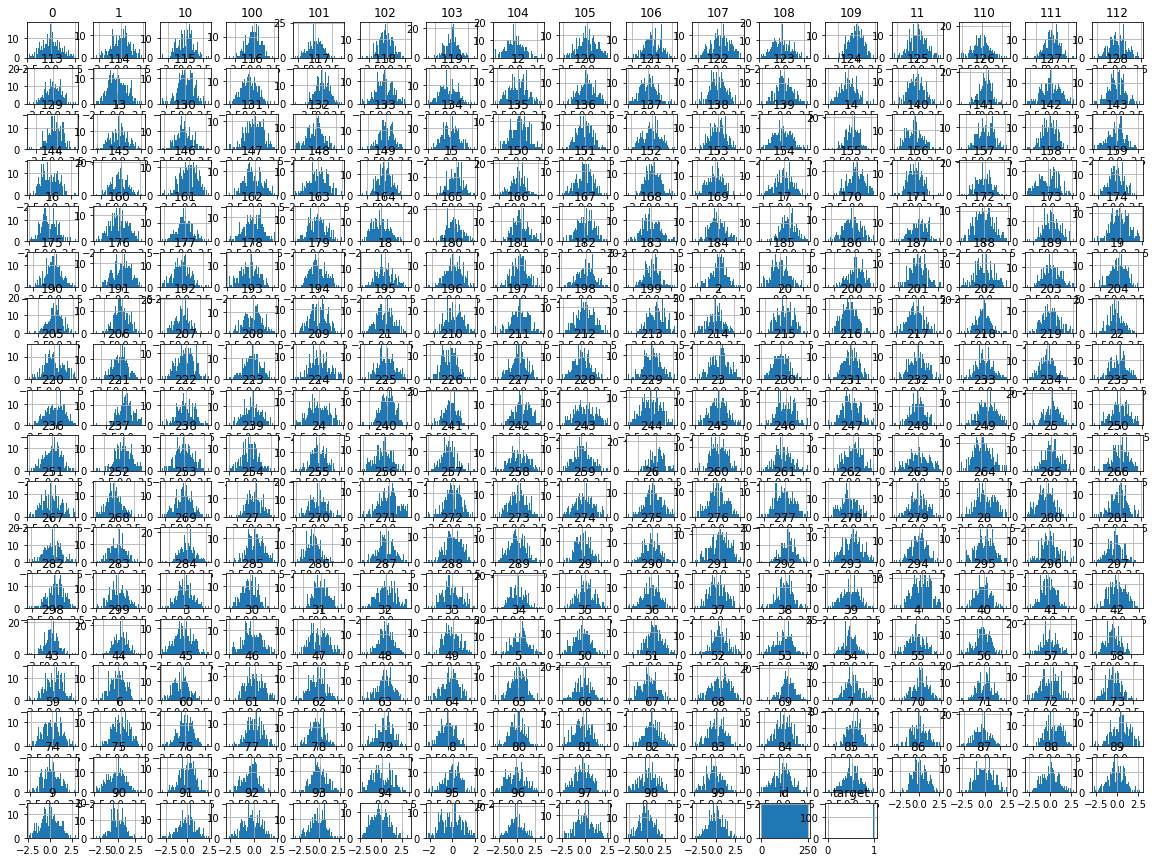

In [35]:
%matplotlib inline

train.hist(bins = 50, figsize = (20,15))
plt.show()

0


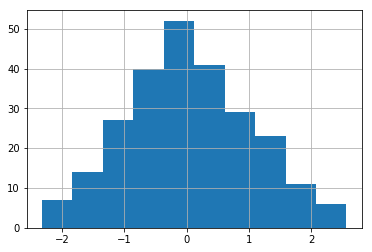

1


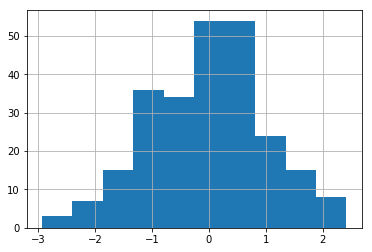

2


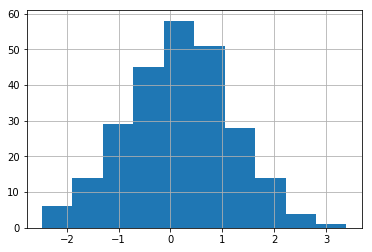

3


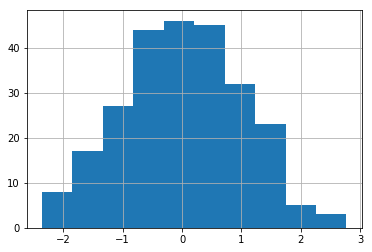

4


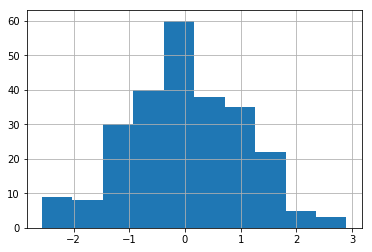

5


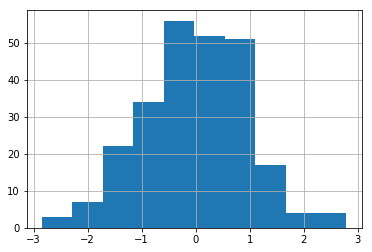

6


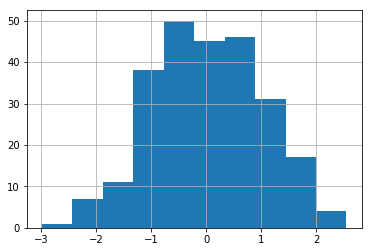

7


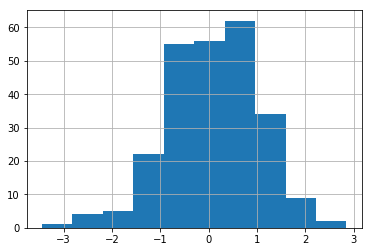

8


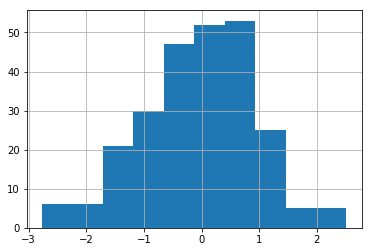

9


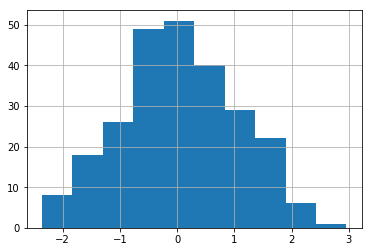

10


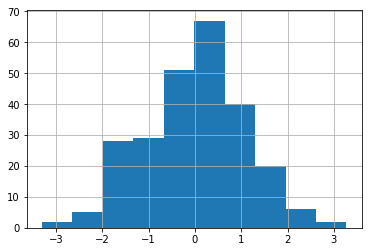

11


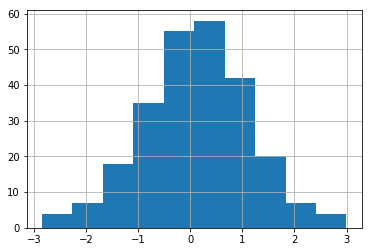

12


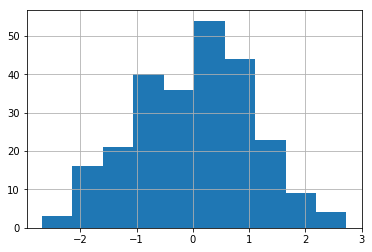

13


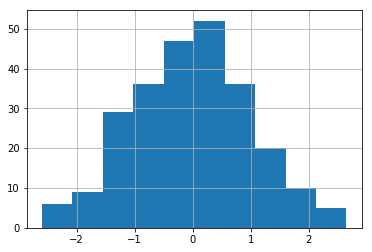

14


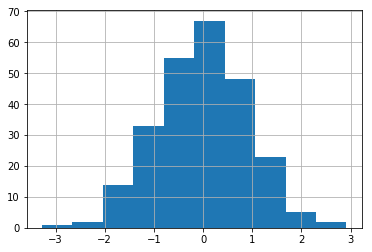

15


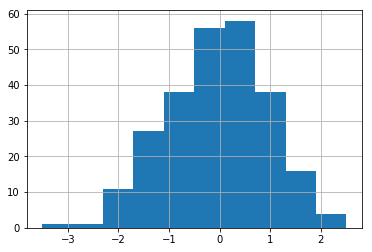

16


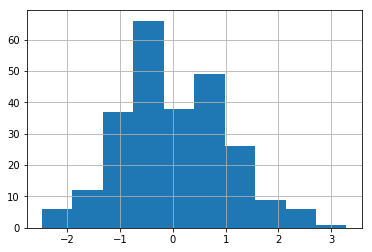

17


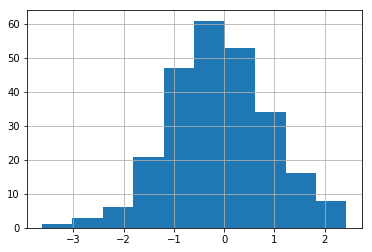

18


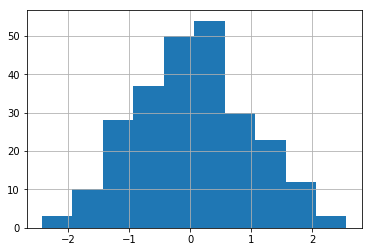

19


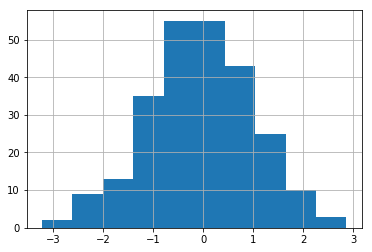

20


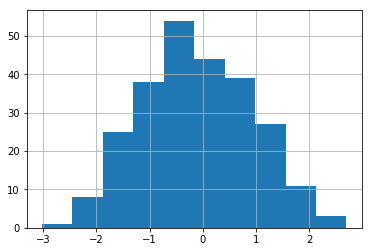

21


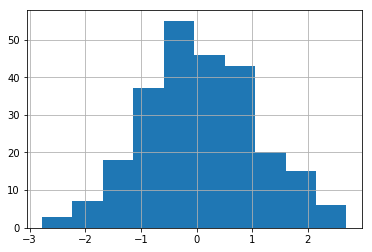

22


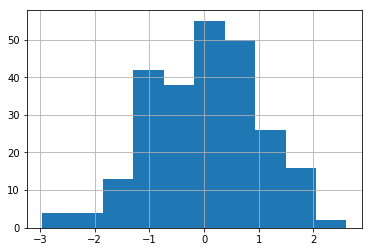

23


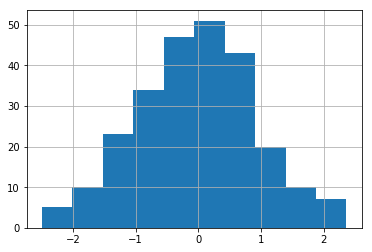

24


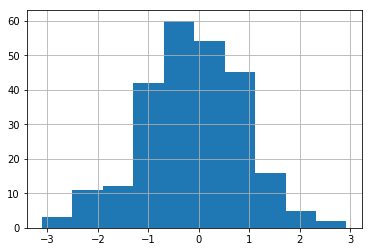

25


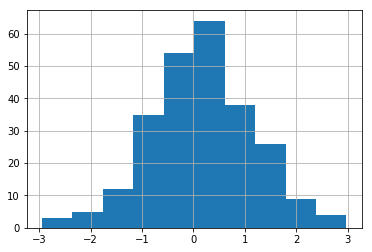

26


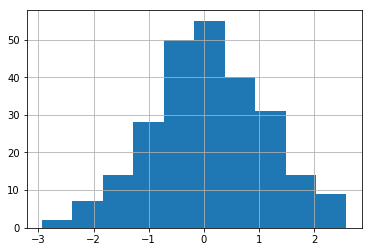

27


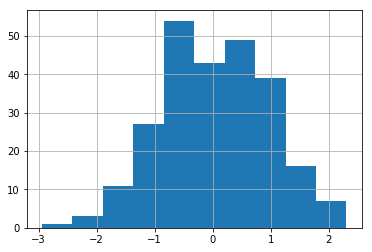

28


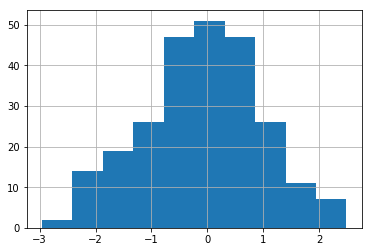

29


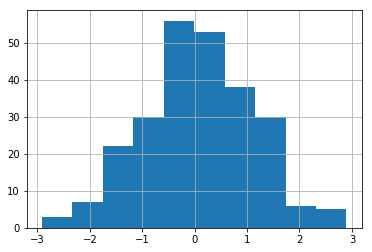

30


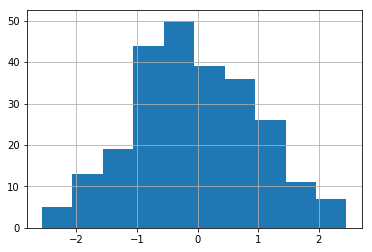

31


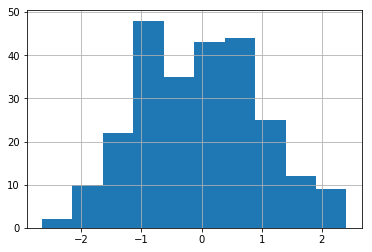

32


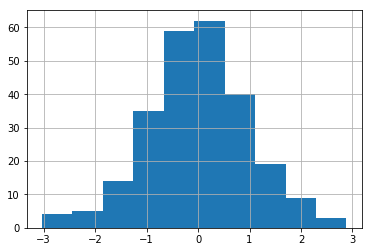

33


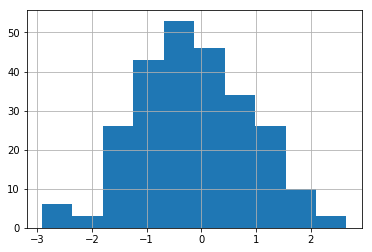

34


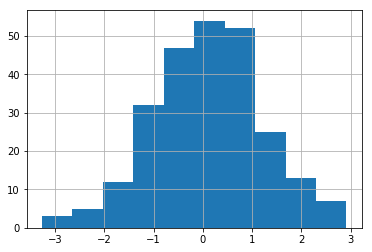

35


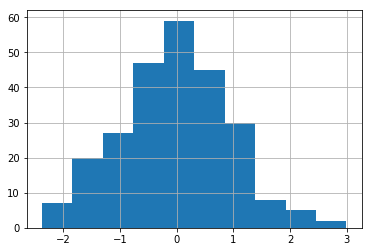

36


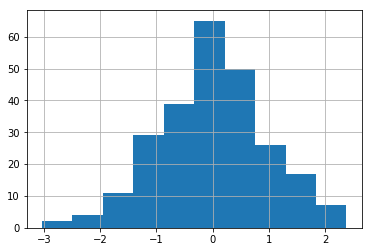

37


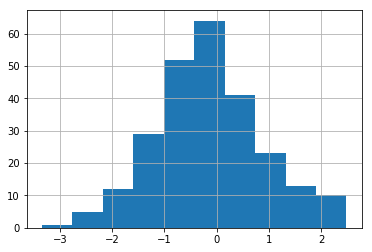

38


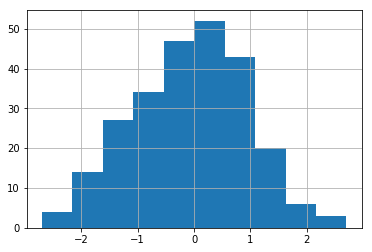

39


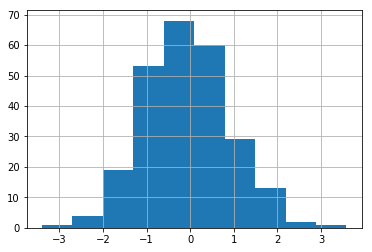

40


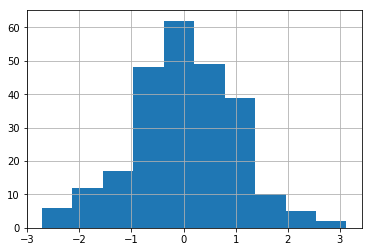

41


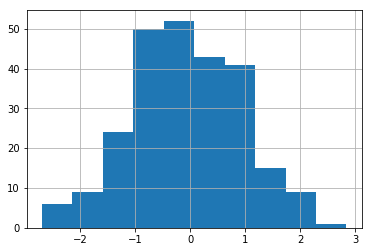

42


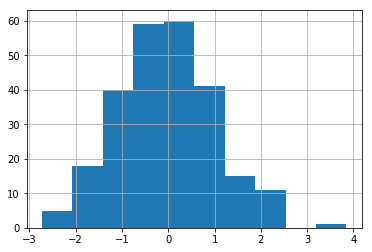

43


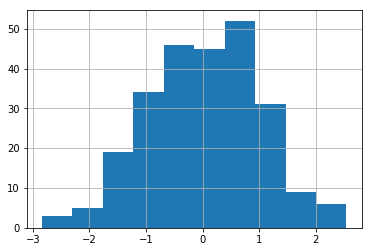

44


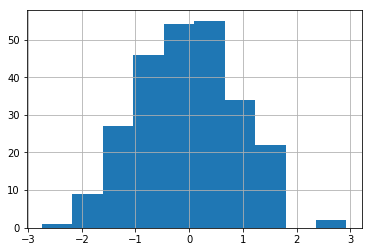

45


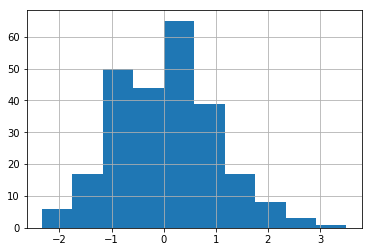

46


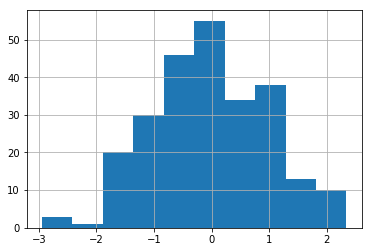

47


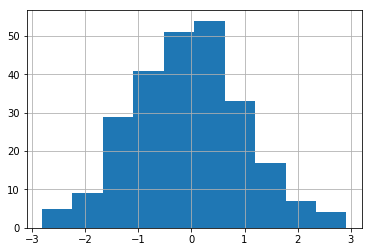

48


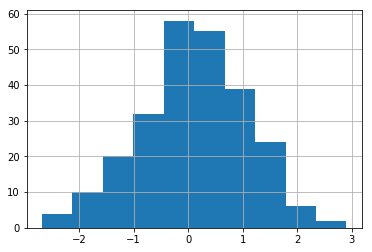

49


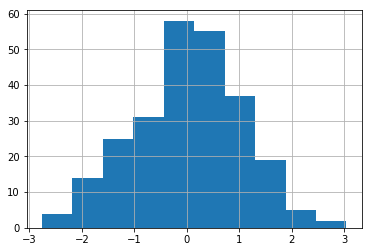

50


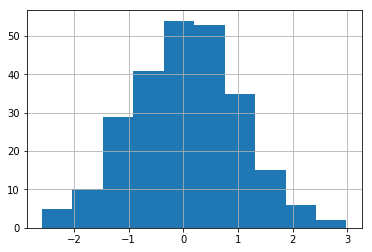

51


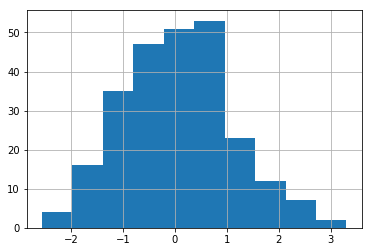

52


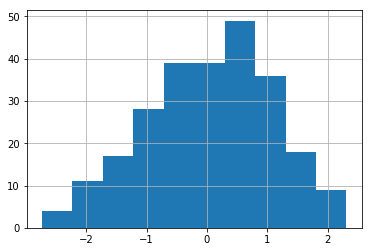

53


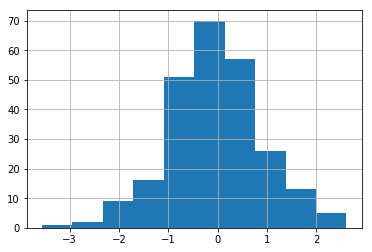

54


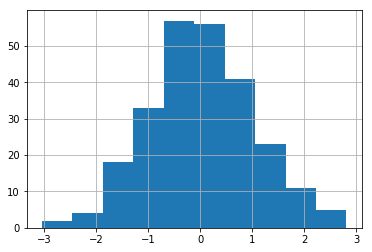

55


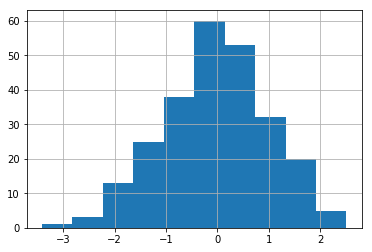

56


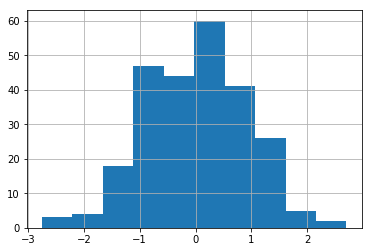

57


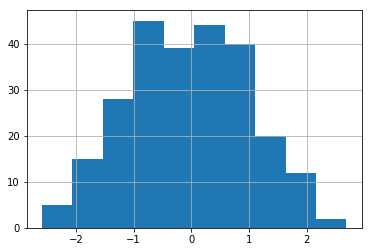

58


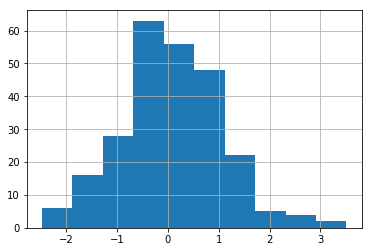

59


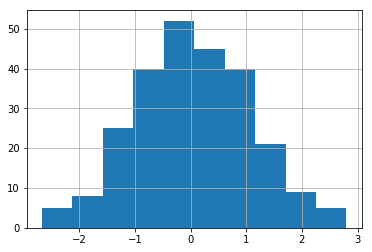

60


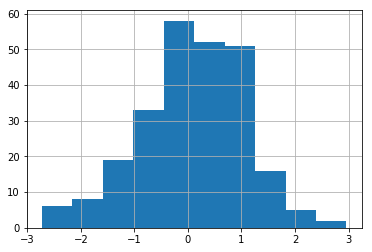

61


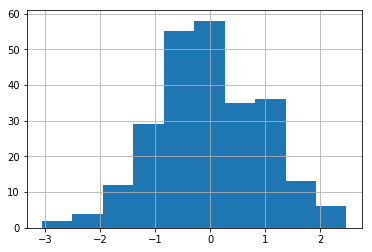

62


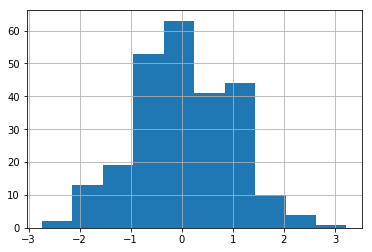

63


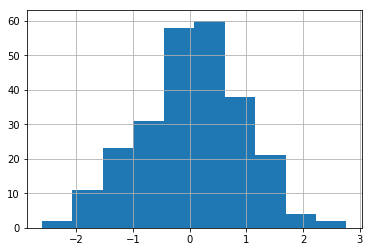

64


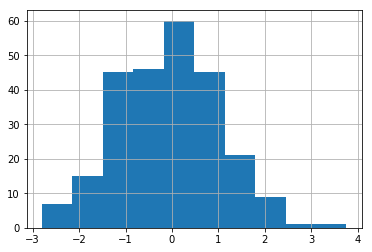

65


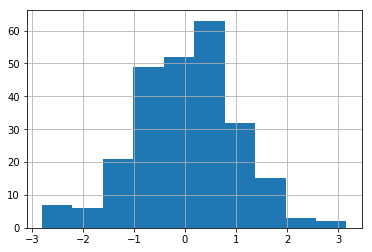

66


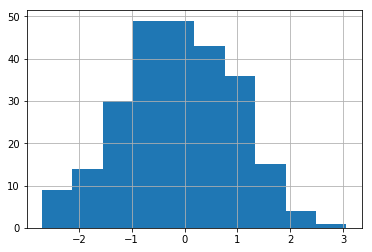

67


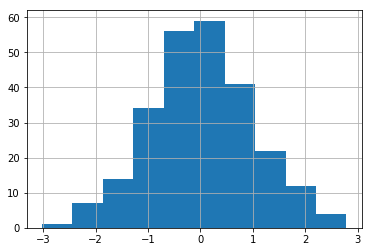

68


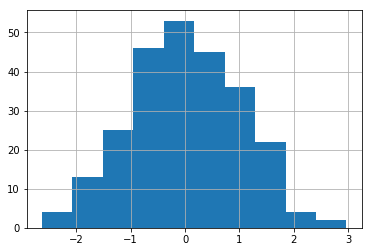

69


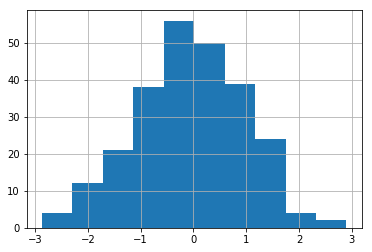

70


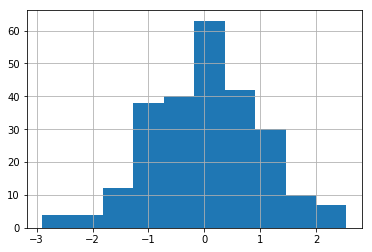

71


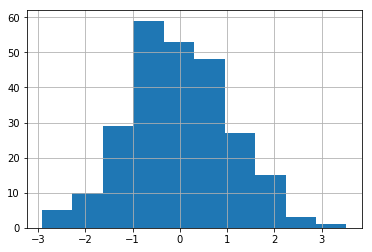

72


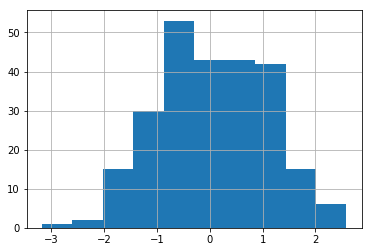

73


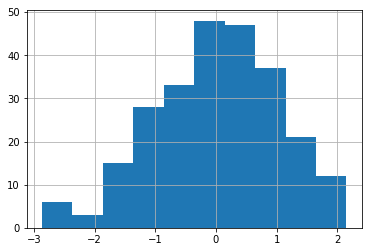

74


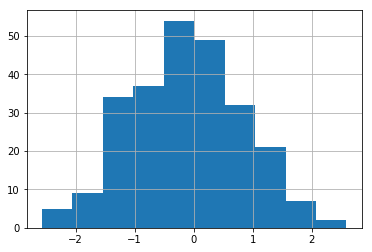

75


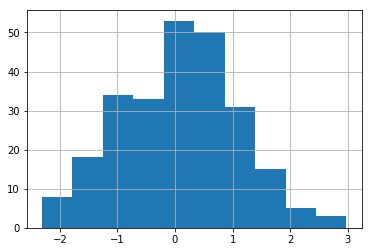

76


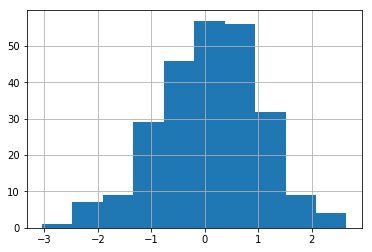

77


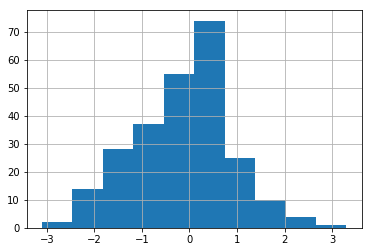

78


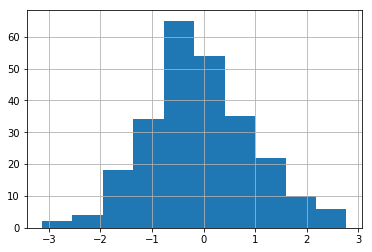

79


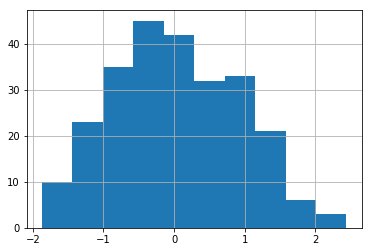

80


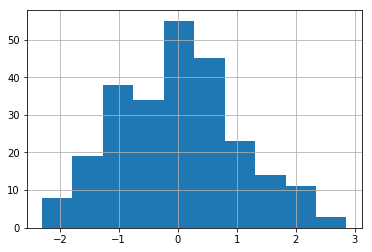

81


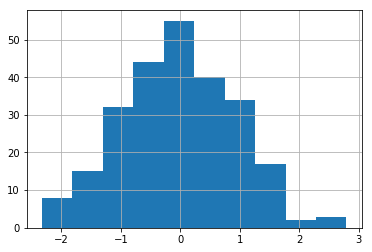

82


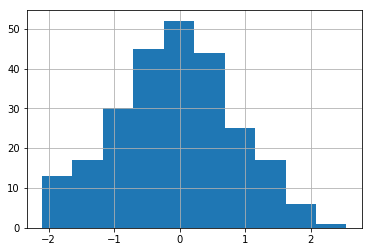

83


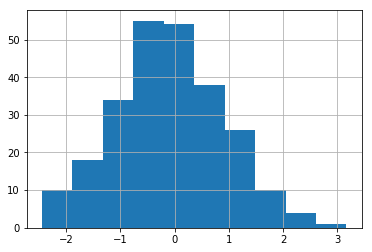

84


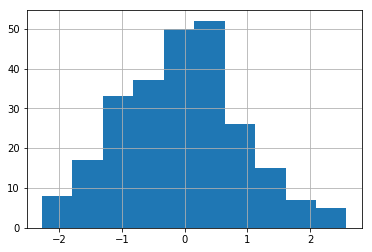

85


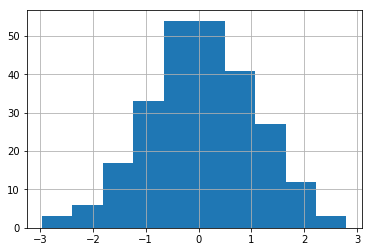

86


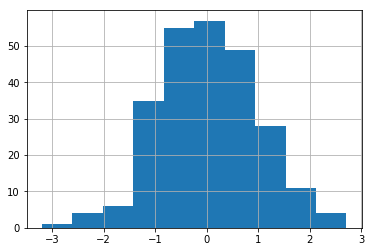

87


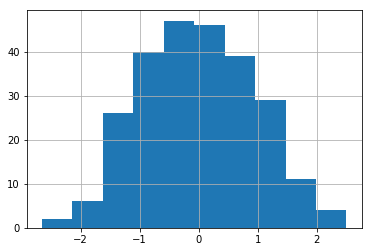

88


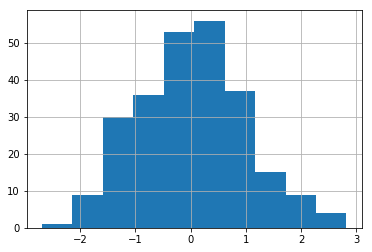

89


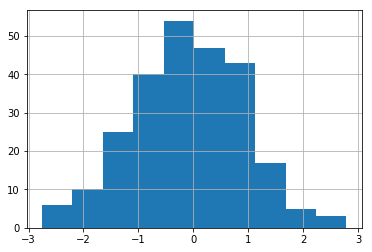

90


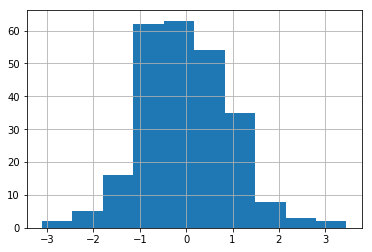

91


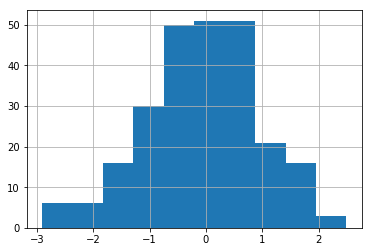

92


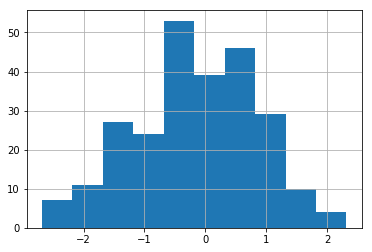

93


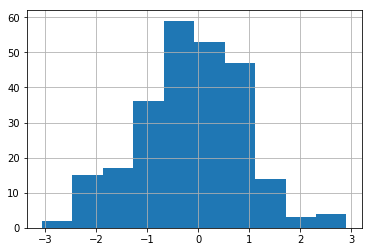

94


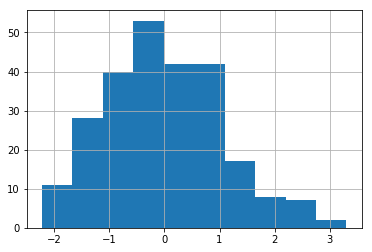

95


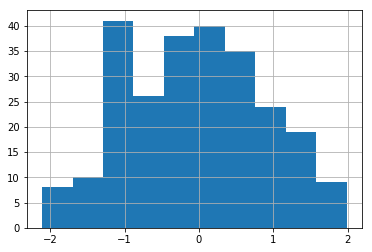

96


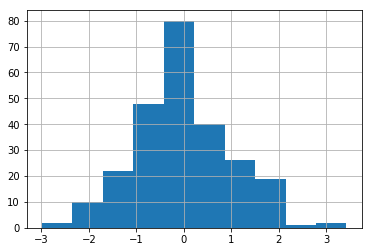

97


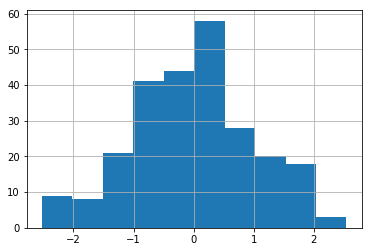

98


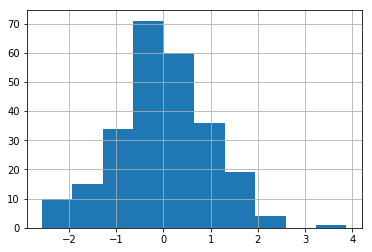

99


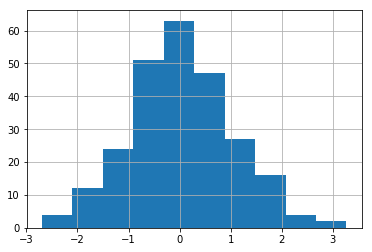

100


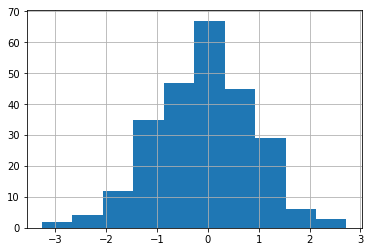

101


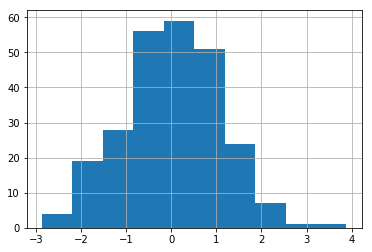

102


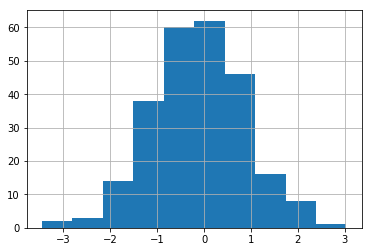

103


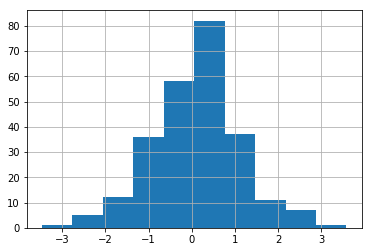

104


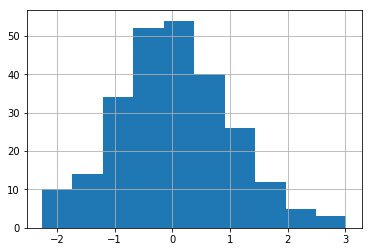

105


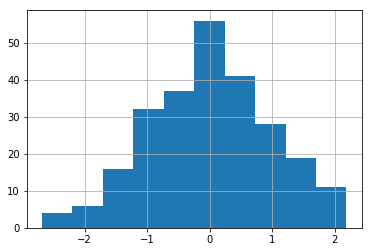

106


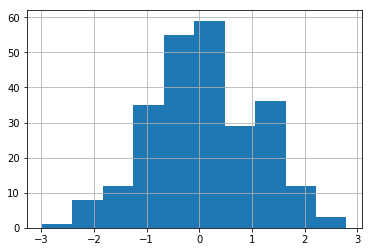

107


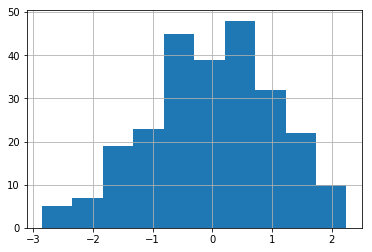

108


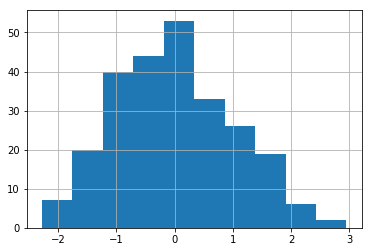

109


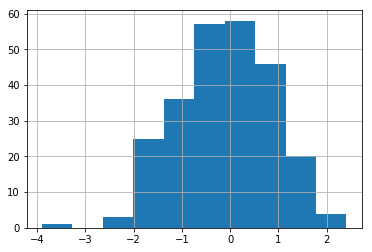

110


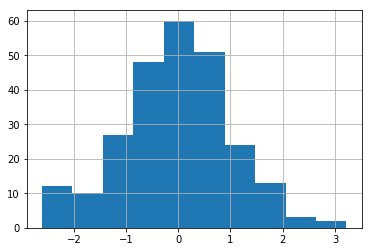

111


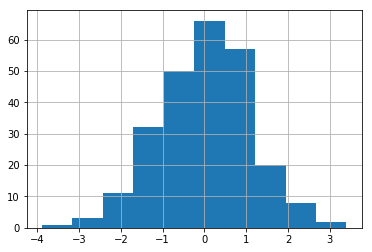

112


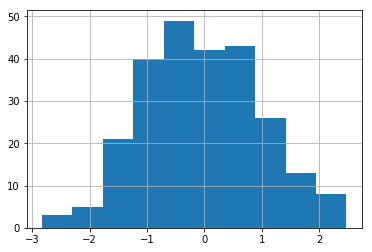

113


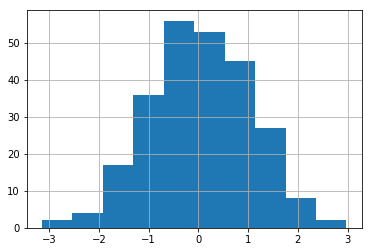

114


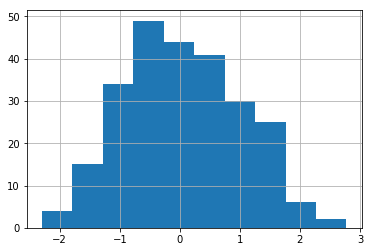

115


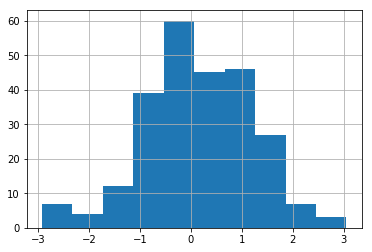

116


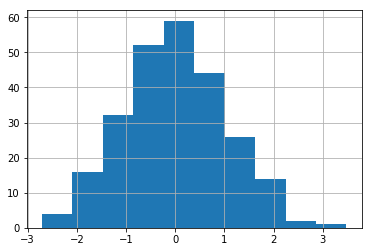

117


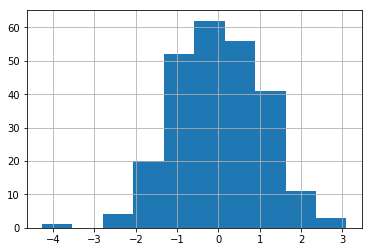

118


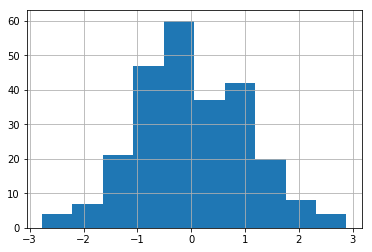

119


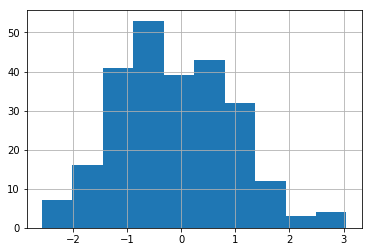

120


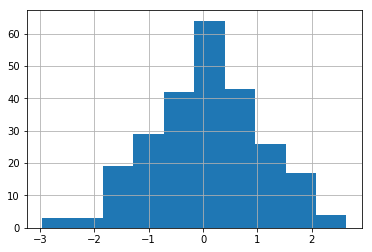

121


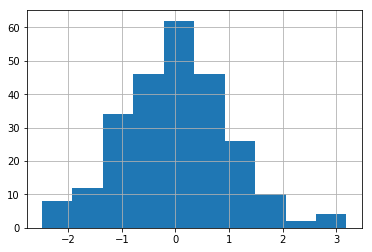

122


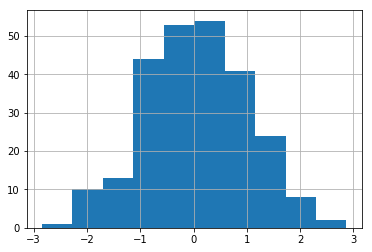

123


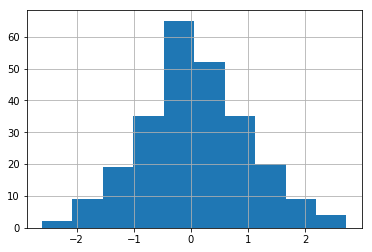

124


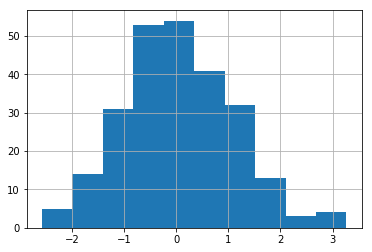

125


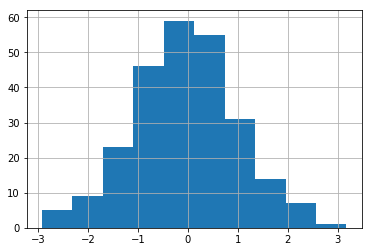

126


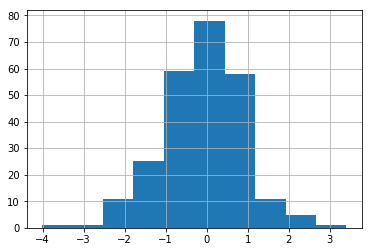

127


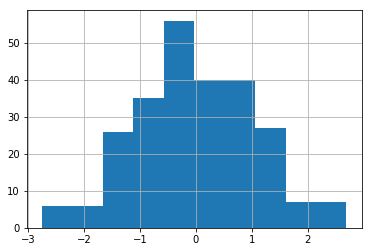

128


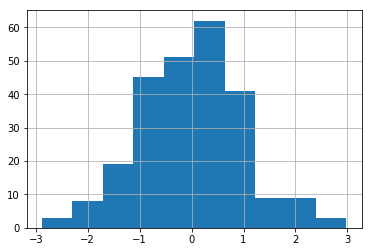

129


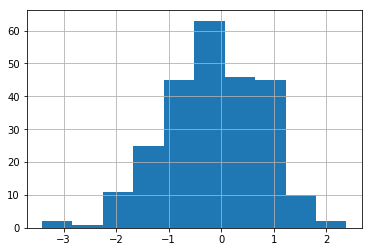

130


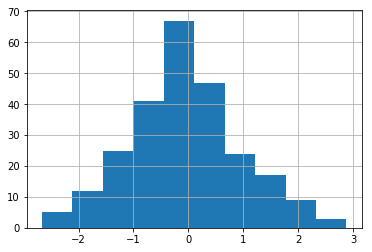

131


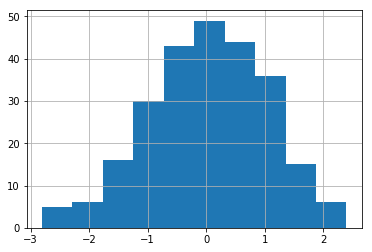

132


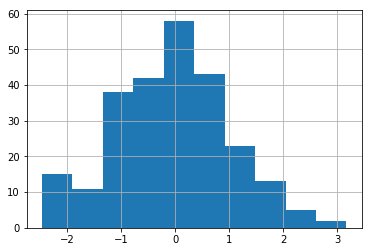

133


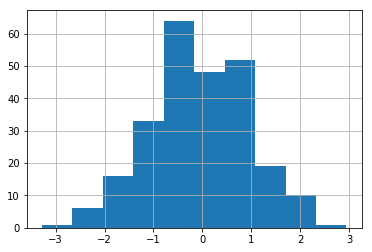

134


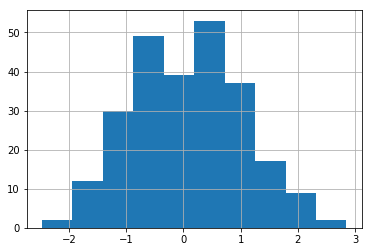

135


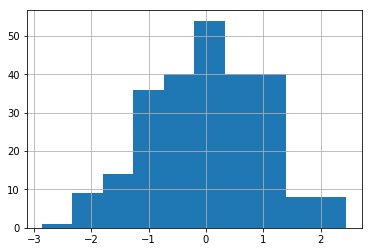

136


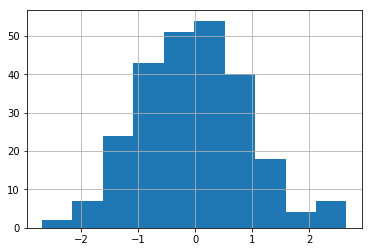

137


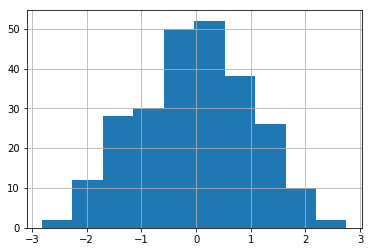

138


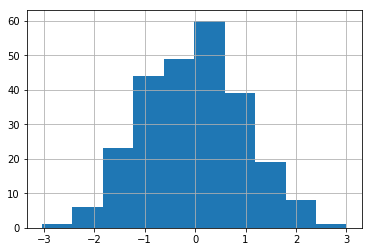

139


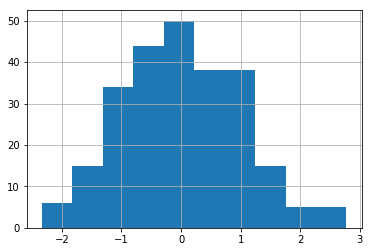

140


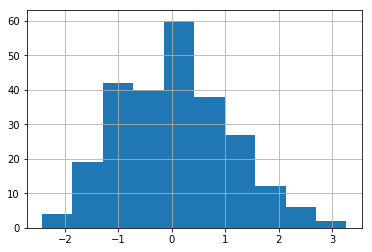

141


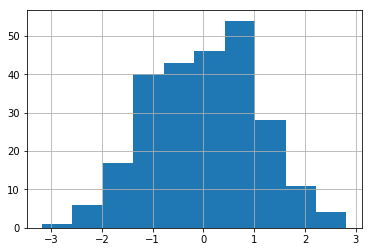

142


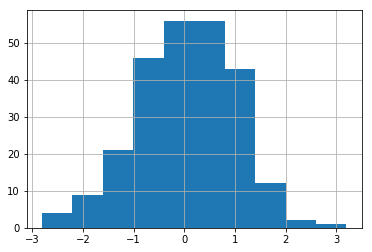

143


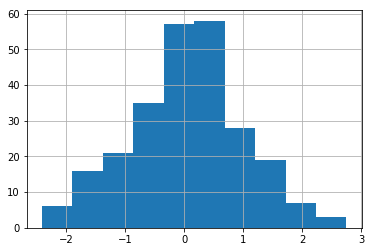

144


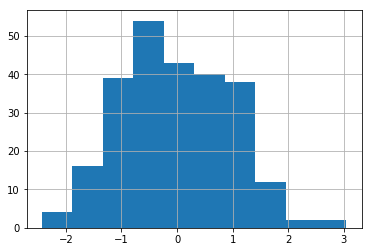

145


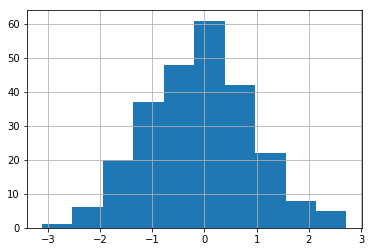

146


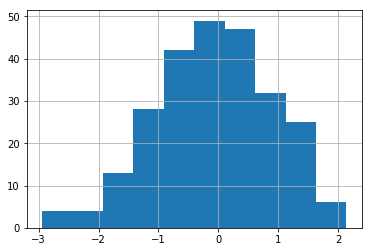

147


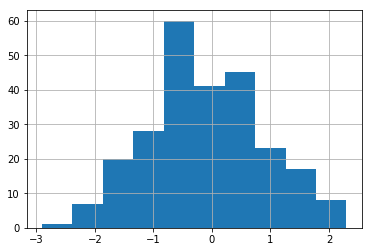

148


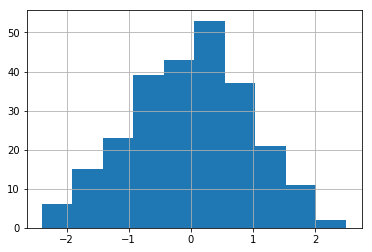

149


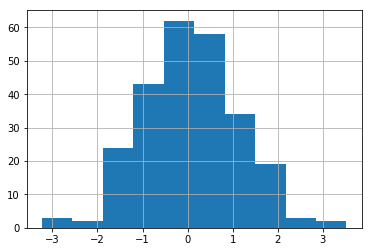

150


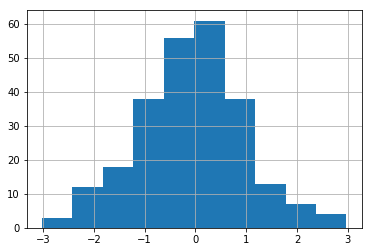

151


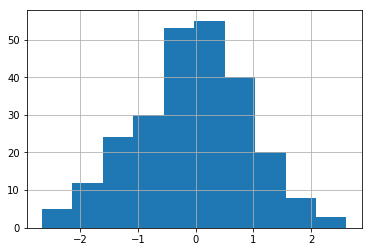

152


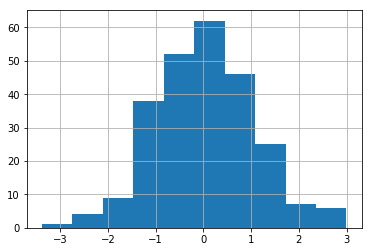

153


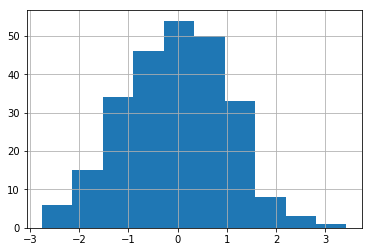

154


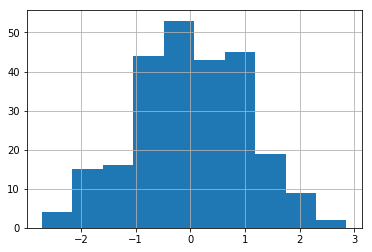

155


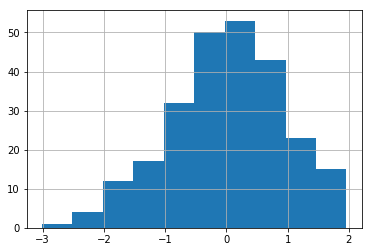

156


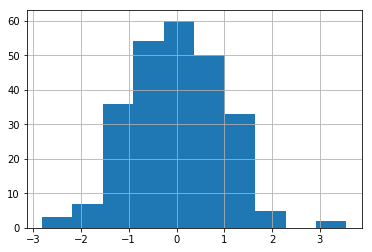

157


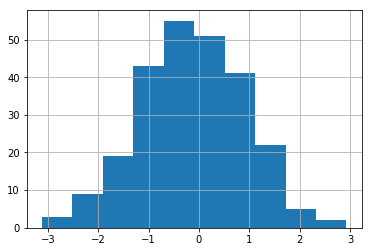

158


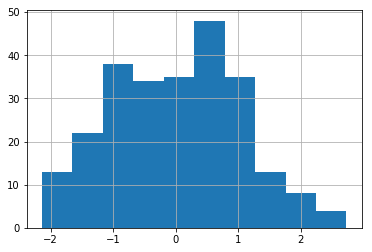

159


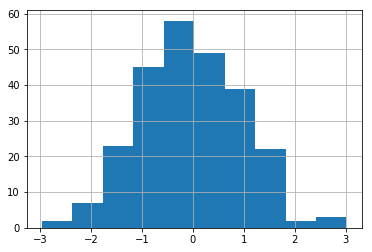

160


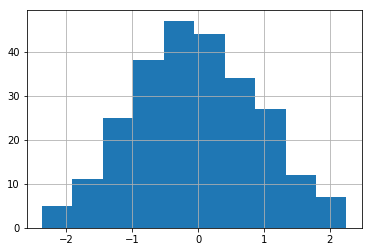

161


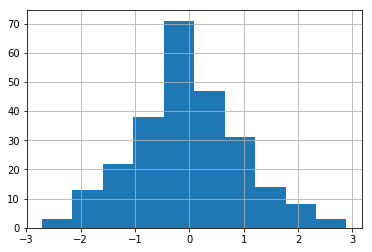

162


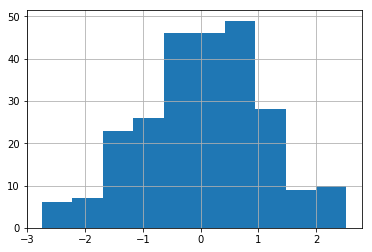

163


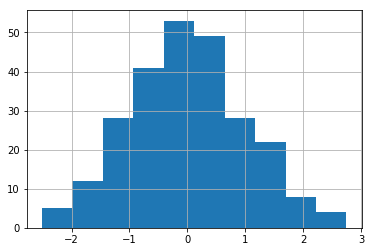

164


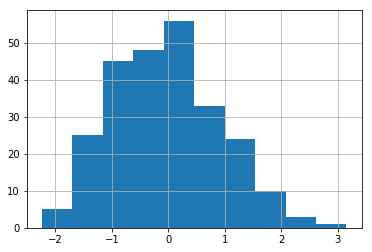

165


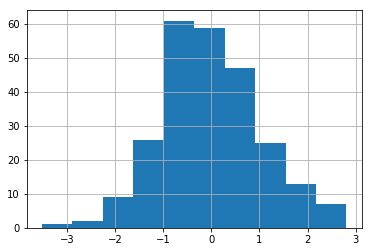

166


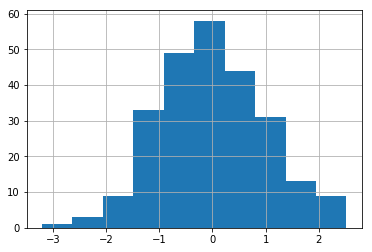

167


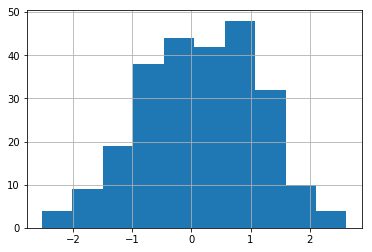

168


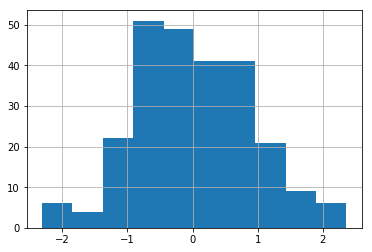

169


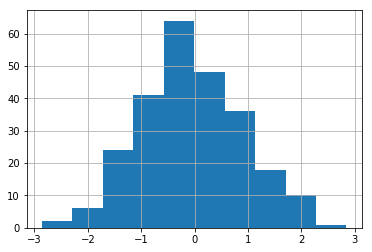

170


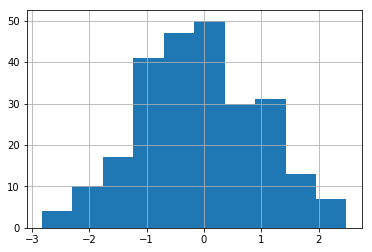

171


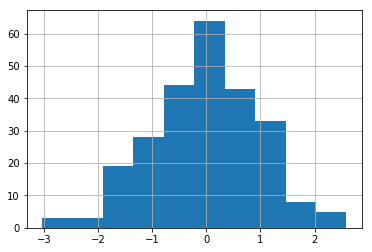

172


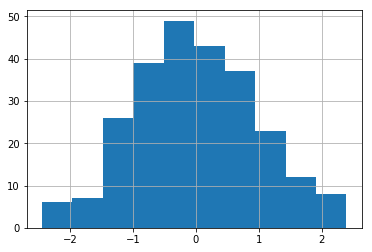

173


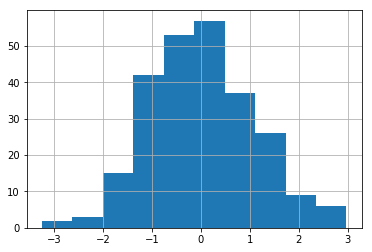

174


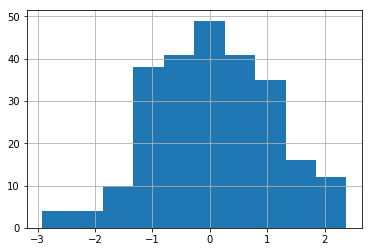

175


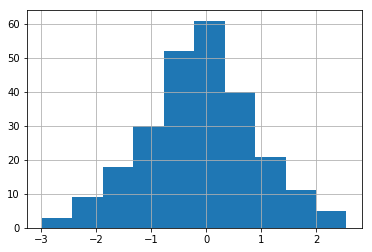

176


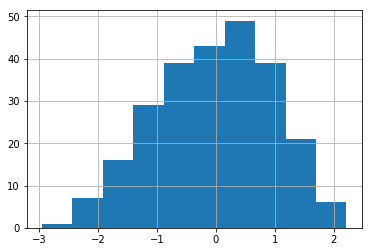

177


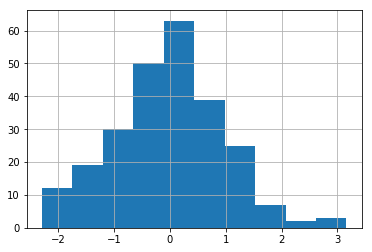

178


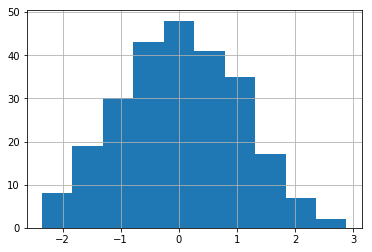

179


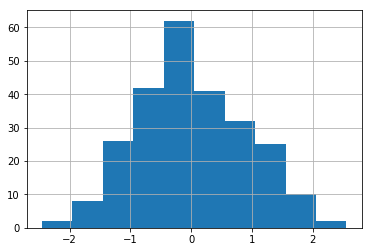

180


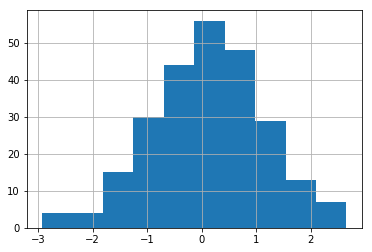

181


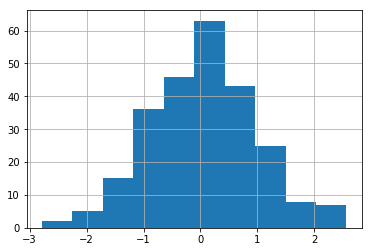

182


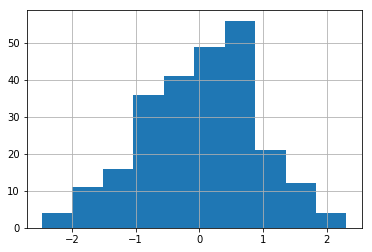

183


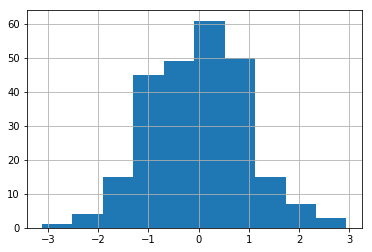

184


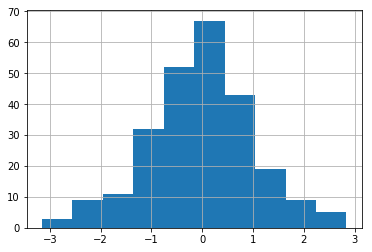

185


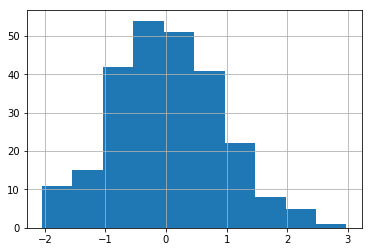

186


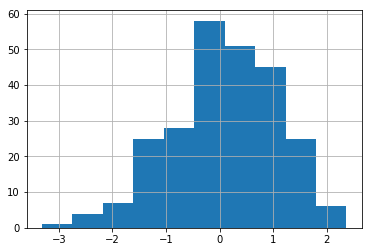

187


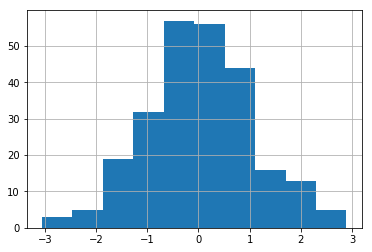

188


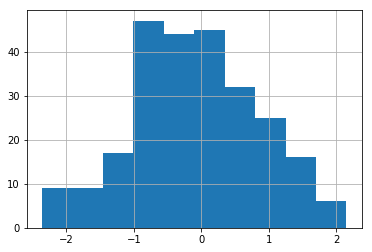

189


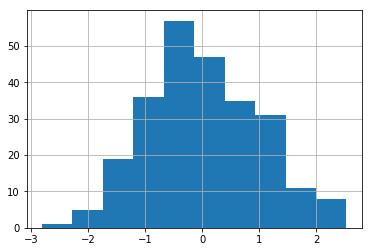

190


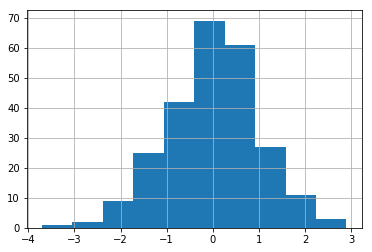

191


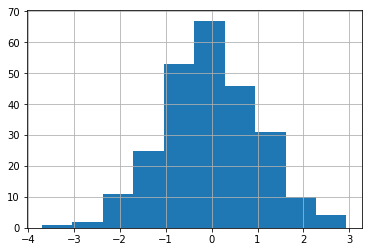

192


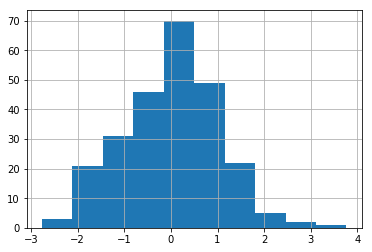

193


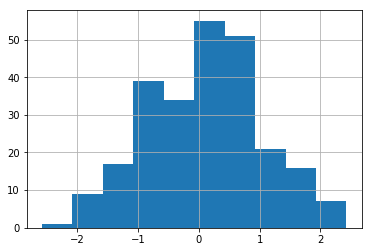

194


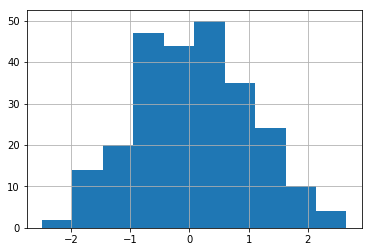

195


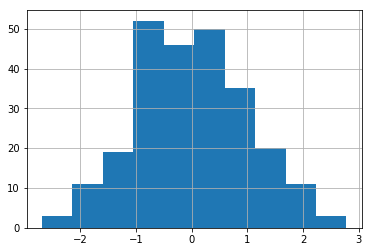

196


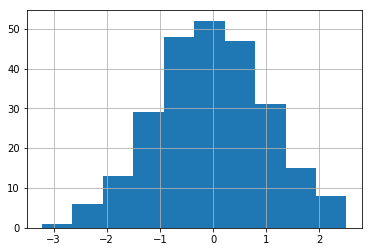

197


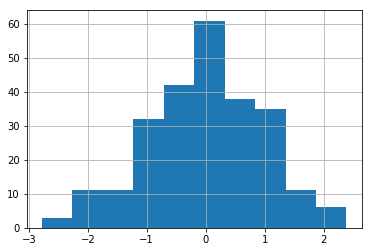

198


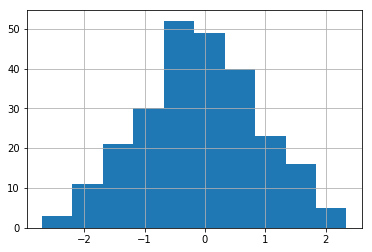

199


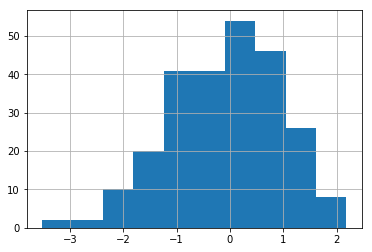

200


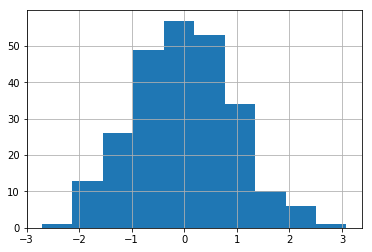

201


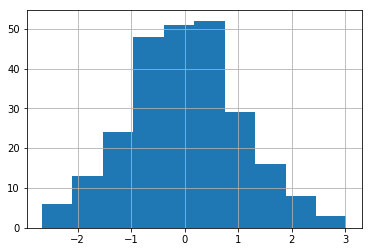

202


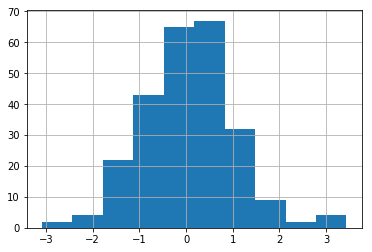

203


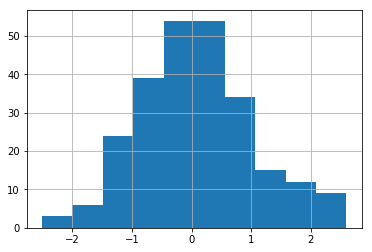

204


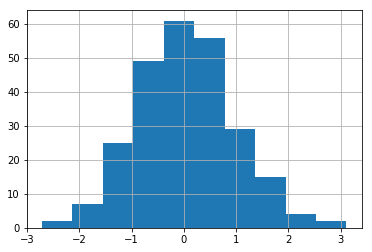

205


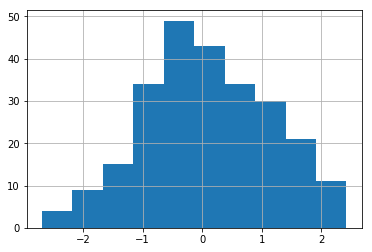

206


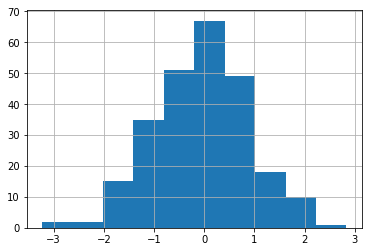

207


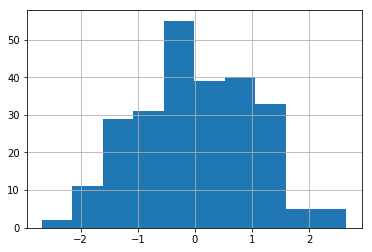

208


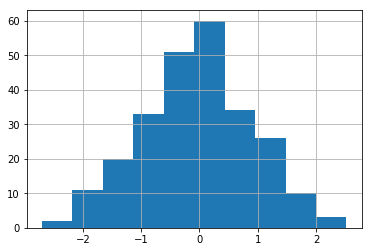

209


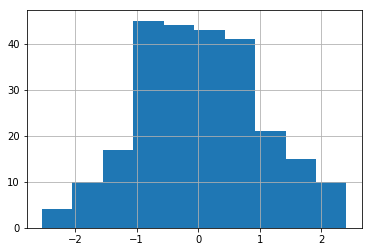

210


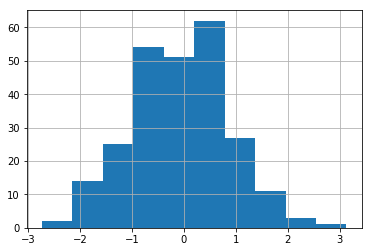

211


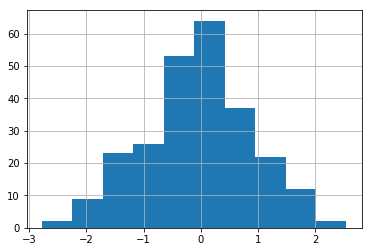

212


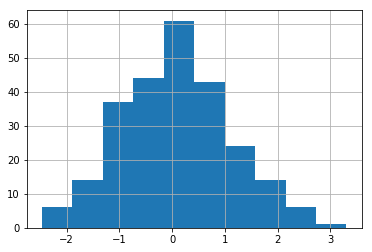

213


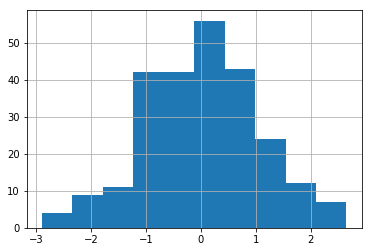

214


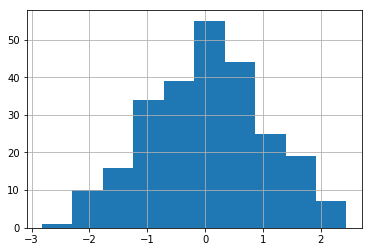

215


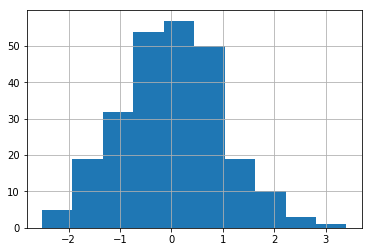

216


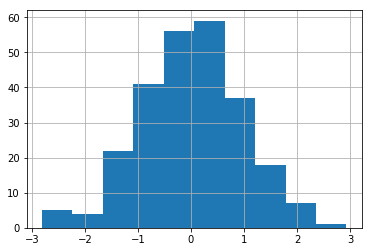

217


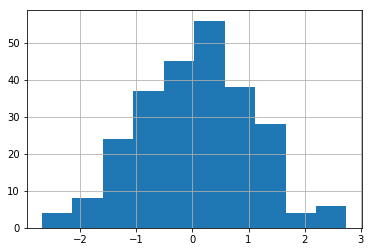

218


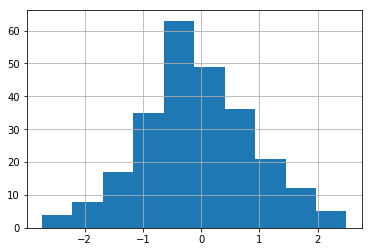

219


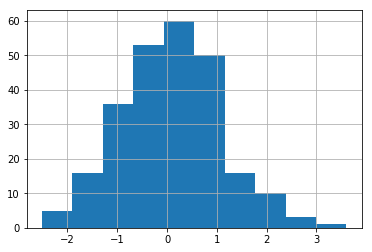

220


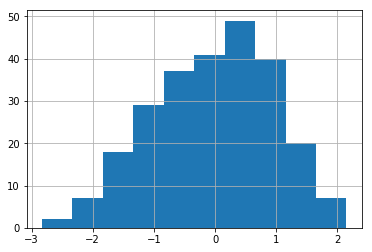

221


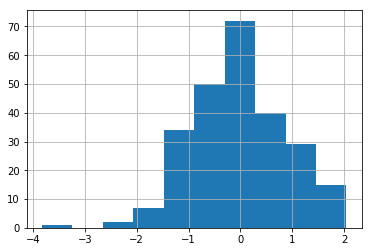

222


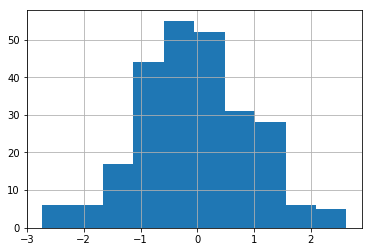

223


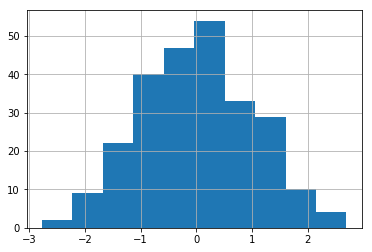

224


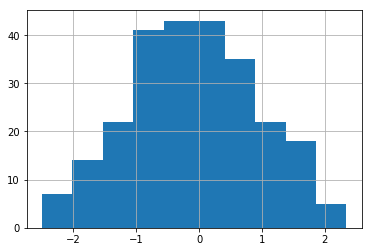

225


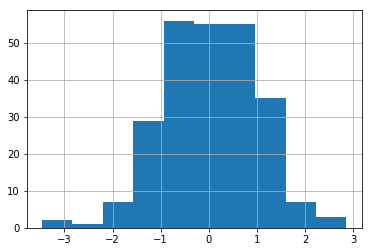

226


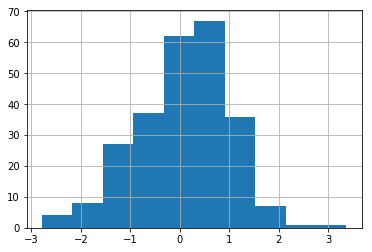

227


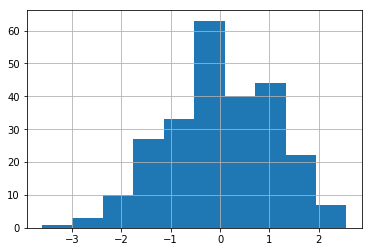

228


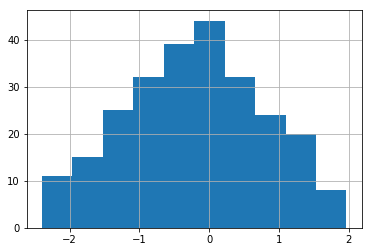

229


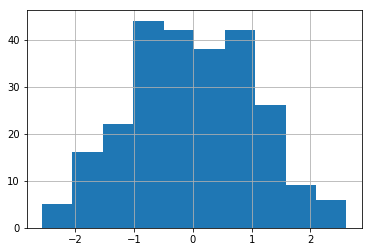

230


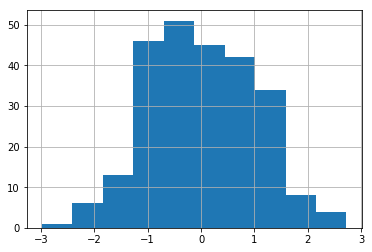

231


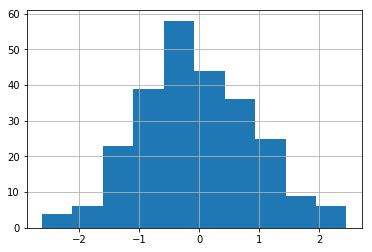

232


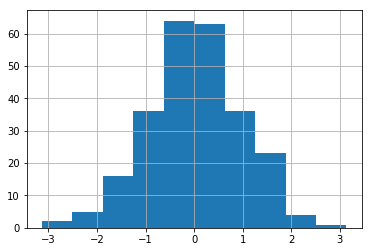

233


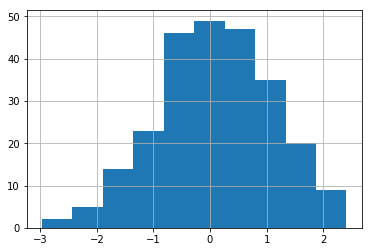

234


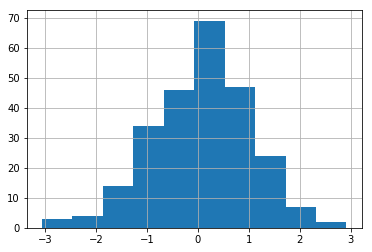

235


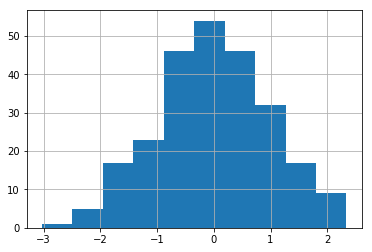

236


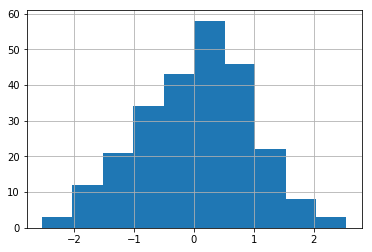

237


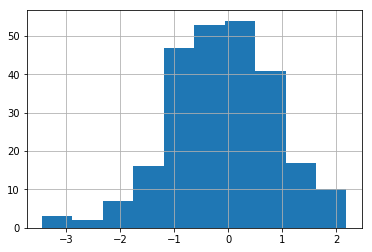

238


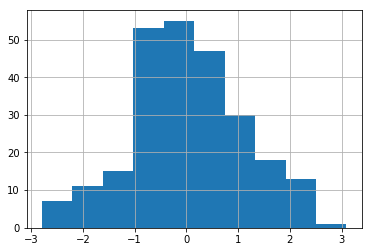

239


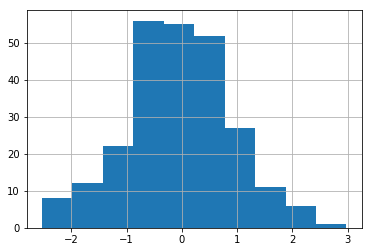

240


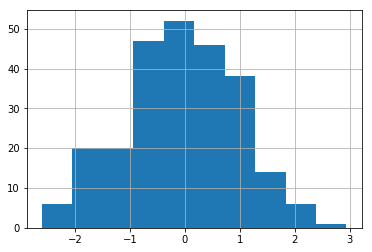

241


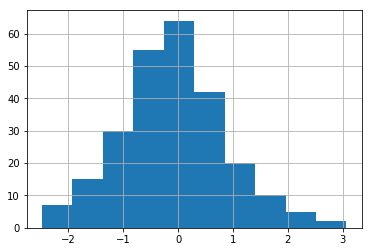

242


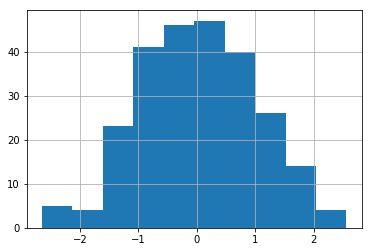

243


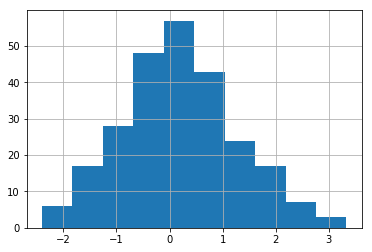

244


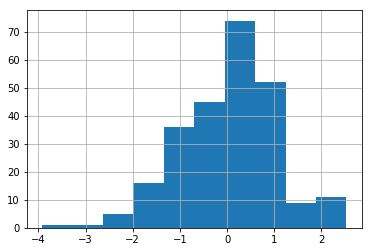

245


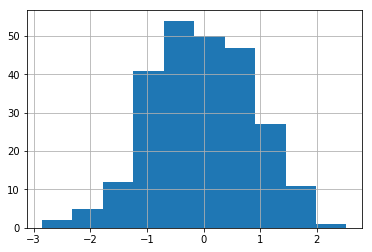

246


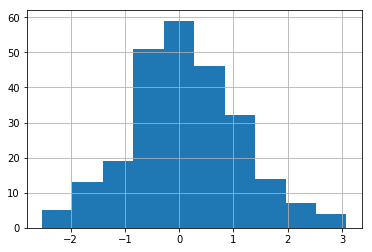

247


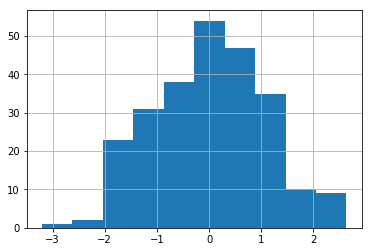

248


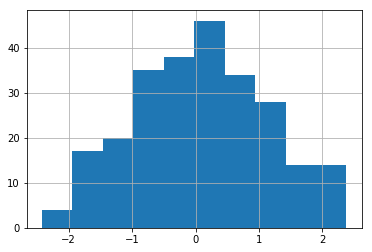

249


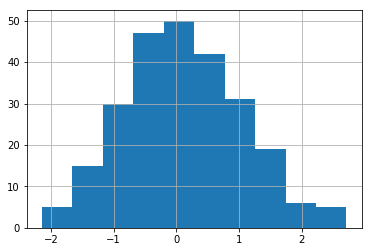

250


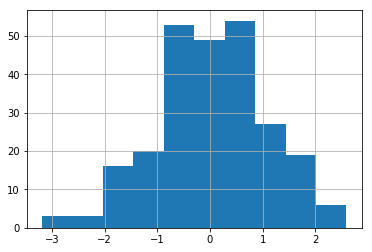

251


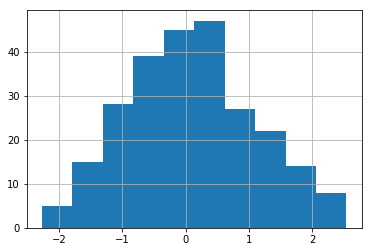

252


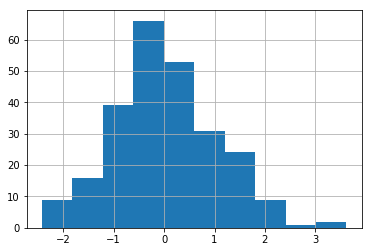

253


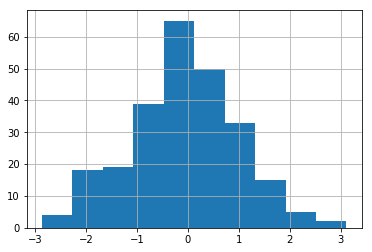

254


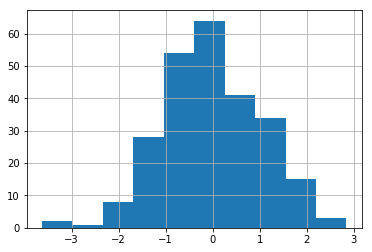

255


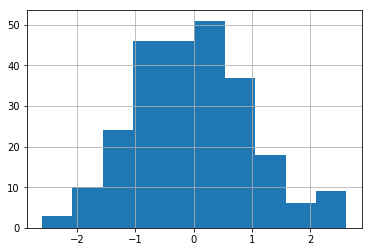

256


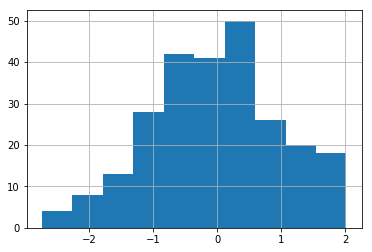

257


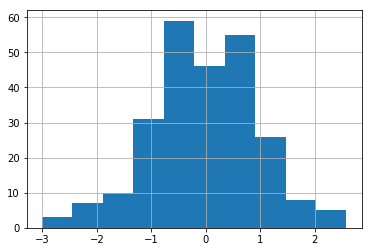

258


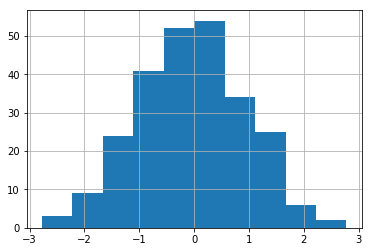

259


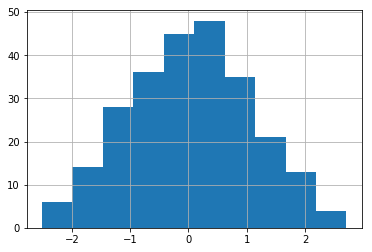

260


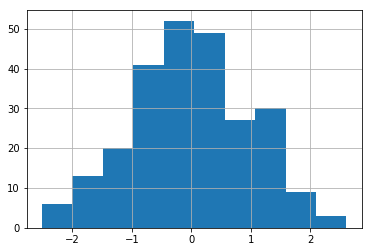

261


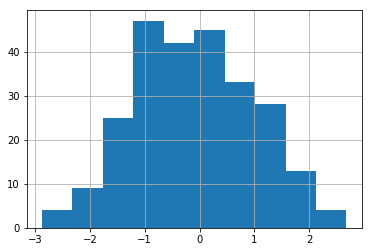

262


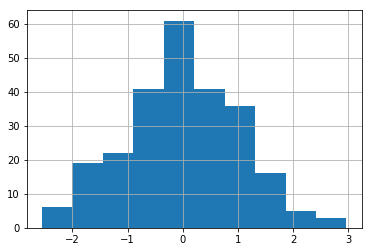

263


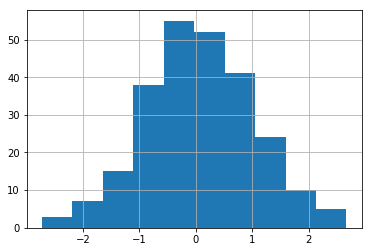

264


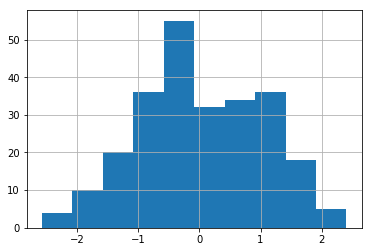

265


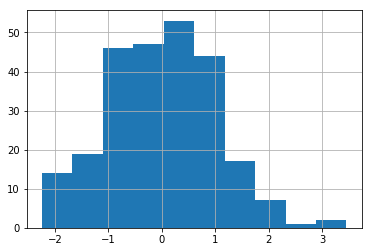

266


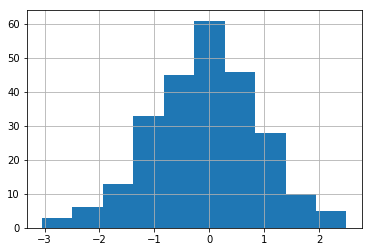

267


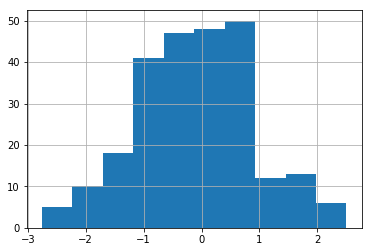

268


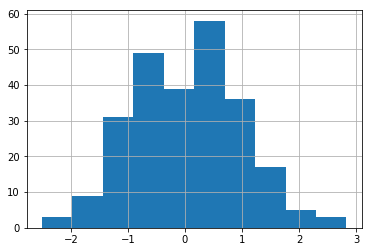

269


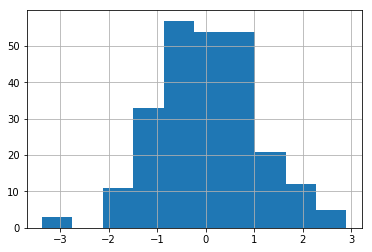

270


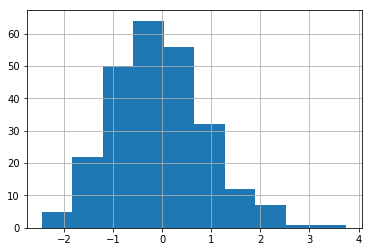

271


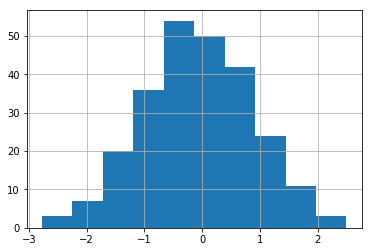

272


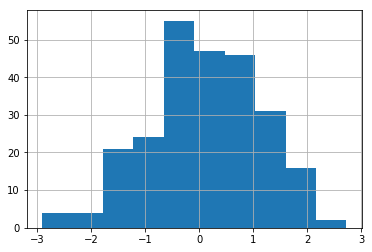

273


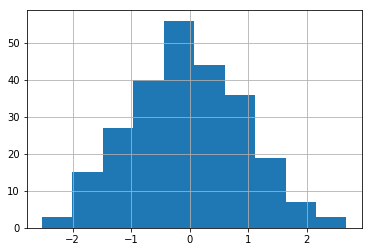

274


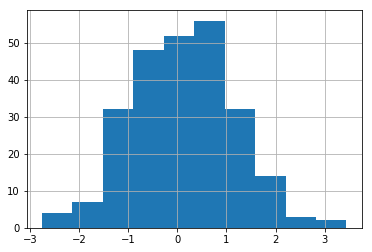

275


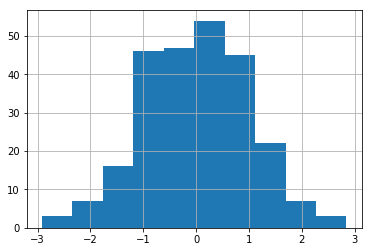

276


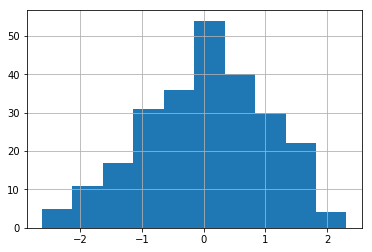

277


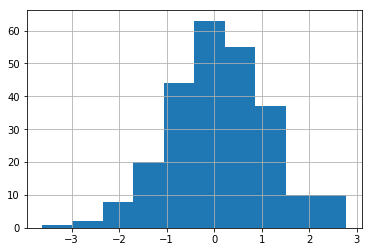

278


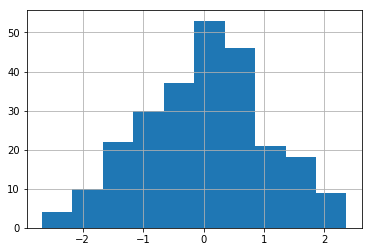

279


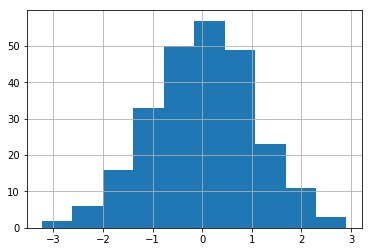

280


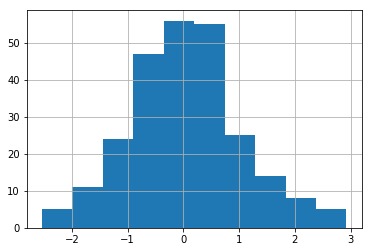

281


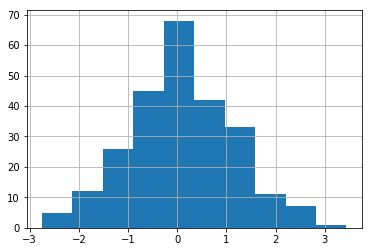

282


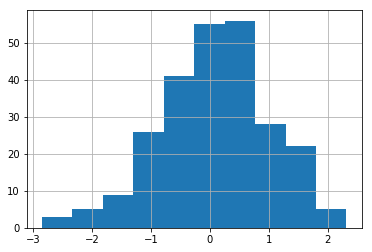

283


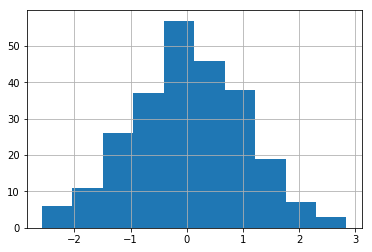

284


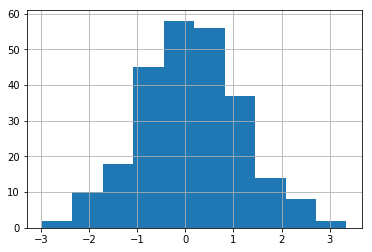

285


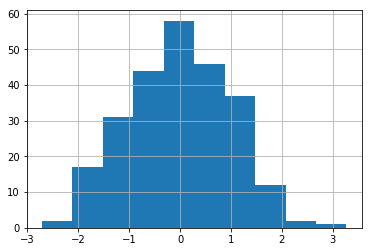

286


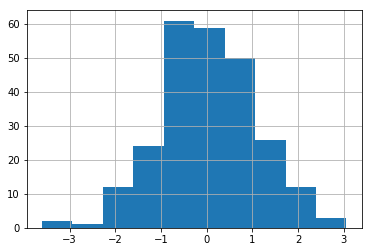

287


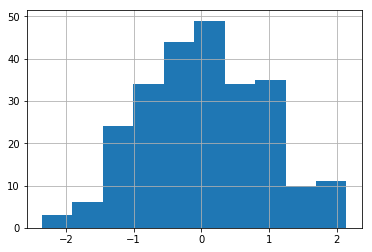

288


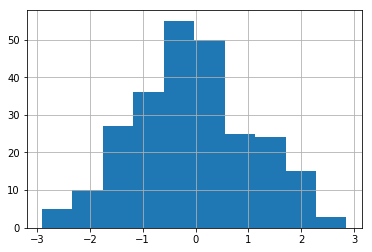

289


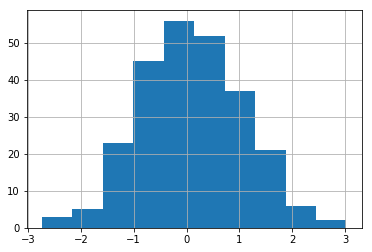

290


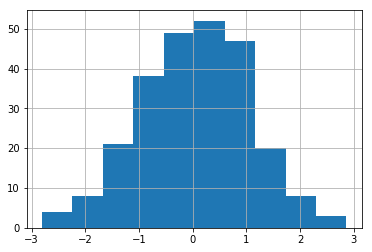

291


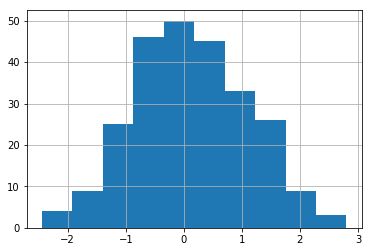

292


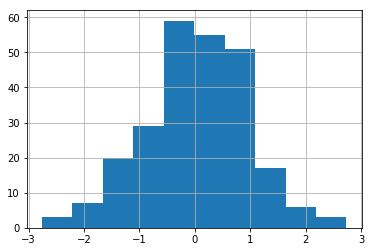

293


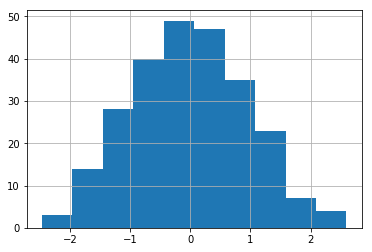

294


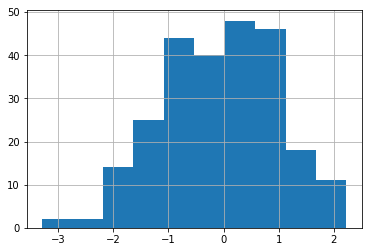

295


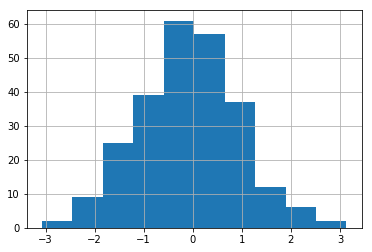

296


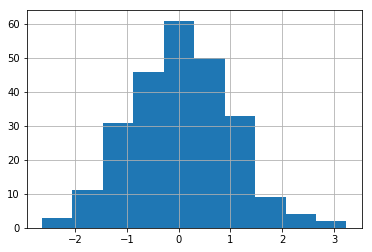

297


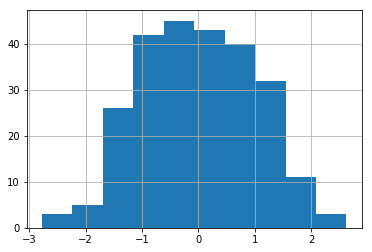

298


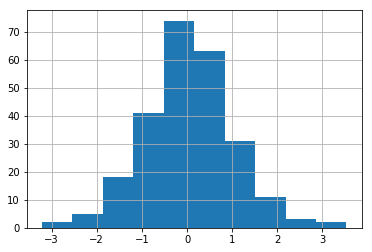

299


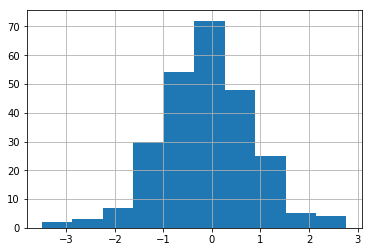

In [11]:
for i in range(300):
    j=str(i)
    print(j)
    train[j].hist()
    plt.show()

# Train & Test set Split

## Stratified Sampling

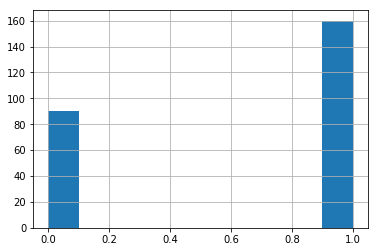

In [9]:
train['target'].hist()
plt.show()

In [10]:
train['target'].value_counts() / len(train)

1.0    0.64
0.0    0.36
Name: target, dtype: float64

In [11]:
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train["target"]):
    sample_train = train.loc[train_index]
    sample_test = train.loc[test_index]

In [12]:
sample_train["target"].value_counts() / len(sample_train)

1.0    0.64
0.0    0.36
Name: target, dtype: float64

In [13]:
sample_test["target"].value_counts() / len(sample_test)

1.0    0.64
0.0    0.36
Name: target, dtype: float64

In [14]:
len(sample_test['id'].unique())

50

In [15]:
len(sample_train['id'].unique())

200

In [16]:
train = sample_train.drop('target', axis=1)
train_label = sample_train['target'].copy()

test = sample_test.drop('target', axis=1)
test_label = sample_test['target'].copy()

In [17]:
feature_name = train.columns[1:]

In [18]:
type(train_label)

pandas.core.series.Series

# Scaling

In [17]:
model = Pipeline([
    ('scaler', StandardScaler())
])

# Model Fitting (RF)

In [19]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(train, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
y_pred_rf = rnd_clf.predict(test)

print("Result of RandomForest")
print()
print(confusion_matrix(test_label, y_pred_rf))
print('accuracy:', accuracy_score(test_label, y_pred_rf))
print('precision:', precision_score(test_label, y_pred_rf))
print('recall:', recall_score(test_label, y_pred_rf))

Result of RandomForest

[[ 1 17]
 [ 0 32]]
accuracy: 0.66
precision: 0.6530612244897959
recall: 1.0


In [21]:
param_distribs = {
        'max_depth': randint(low=1, high=10),
        'max_leaf_nodes': randint(low=4, high=16),
        'min_samples_leaf' : randint(low=1, high=10),
        'n_estimators' : randint(low=100, high=1000)
    }

rf_clf = RandomForestClassifier()
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring='roc_auc', return_train_score=True,
                                random_state=42, n_jobs=-1)


rnd_search.fit(train, train_label)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022FEBC67C88>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022FEBC671D0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022FEBC57240>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022FEBC57390>},
          pre_dispatch='2*n_

In [22]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.6921565934065934 {'max_depth': 7, 'max_leaf_nodes': 7, 'min_samples_leaf': 8, 'n_estimators': 800}
0.6600343406593407 {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 3, 'n_estimators': 314}
0.6763736263736264 {'max_depth': 8, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'n_estimators': 971}
0.6538392857142858 {'max_depth': 8, 'max_leaf_nodes': 6, 'min_samples_leaf': 6, 'n_estimators': 408}
0.703592032967033 {'max_depth': 2, 'max_leaf_nodes': 11, 'min_samples_leaf': 6, 'n_estimators': 485}
0.64941163003663 {'max_depth': 5, 'max_leaf_nodes': 4, 'min_samples_leaf': 6, 'n_estimators': 352}
0.6444963369963369 {'max_depth': 9, 'max_leaf_nodes': 4, 'min_samples_leaf': 3, 'n_estimators': 975}
0.6742330586080587 {'max_depth': 7, 'max_leaf_nodes': 7, 'min_samples_leaf': 9, 'n_estimators': 230}
0.6017605311355312 {'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_leaf': 7, 'n_estimators': 120}
0.6241918498168499 {'max_depth': 9, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'n_estimato

In [26]:
estimator = rnd_search.best_estimator_

In [33]:
cvres

{'mean_fit_time': array([2.20360994, 0.94597073, 2.95131059, 1.06126304, 1.1792469 ,
        0.89121652, 2.51876836, 0.60228925, 0.31625326, 1.39287682]),
 'std_fit_time': array([0.16327397, 0.0466238 , 0.08215078, 0.02635155, 0.03862178,
        0.02364447, 0.06373344, 0.04428322, 0.01471471, 0.11001506]),
 'mean_score_time': array([0.1091089 , 0.05425541, 0.13912926, 0.05624993, 0.0693151 ,
        0.05345786, 0.13723371, 0.03331161, 0.01885009, 0.06562507]),
 'std_score_time': array([0.01014327, 0.01707858, 0.01358912, 0.00546591, 0.00559296,
        0.00825066, 0.01253798, 0.00444228, 0.00082875, 0.00579468]),
 'param_max_depth': masked_array(data=[7, 5, 8, 8, 2, 5, 9, 7, 5, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_leaf_nodes': masked_array(data=[7, 10, 8, 6, 11, 4, 4, 7, 6, 10],
              mask=[False, False, False, False, False, False, False

In [55]:
threshold = 0.65

predicted_proba = estimator.predict_proba(test)
y_pred_04 = (predicted_proba [:,1] >= threshold).astype('int')

print(confusion_matrix(test_label, y_pred_04))
print()
print("accuracy_score: ", accuracy_score(test_label, y_pred_04))
print("precision_score:", precision_score(test_label, y_pred_04))
print("recall_score:", recall_score(test_label, y_pred_04))

[[15  3]
 [ 8 24]]

accuracy_score:  0.78
precision_score: 0.8888888888888888
recall_score: 0.75


In [64]:
def result_by_changing_threshold(threshold, estimator, test, test_label):
    predicted_proba = estimator.predict_proba(test)
    y_pred = (predicted_proba [:,1] >= threshold).astype('int')
    
    confusionMatrix = confusion_matrix(test_label, y_pred)
    accuracy = accuracy_score(test_label, y_pred)
    precision = precision_score(test_label, y_pred)
    recall = recall_score(test_label, y_pred)
    
    y_scores = estimator.predict_proba(test)[:,[1]]
    rocAuc = roc_auc_score(test_label, y_scores)
    
    return accuracy, precision, recall, rocAuc

for i in range(20):
    threshold = (i+50)/100
    result=result_by_changing_threshold(threshold, estimator, test, test_label)
    print('threshold:', threshold, '\n Accuracy:', result[0], '\n Precision:', result[1], '\n Recall:', result[2], '\n RocAuc:', result[3])
    print()
# threshold=0.6
# result_by_changing_threshold(threshold, estimator, test, test_label)

threshold: 0.5 
 Accuracy: 0.64 
 Precision: 0.64 
 Recall: 1.0 
 RocAuc: 0.875

threshold: 0.51 
 Accuracy: 0.66 
 Precision: 0.6530612244897959 
 Recall: 1.0 
 RocAuc: 0.875

threshold: 0.52 
 Accuracy: 0.66 
 Precision: 0.6530612244897959 
 Recall: 1.0 
 RocAuc: 0.875

threshold: 0.53 
 Accuracy: 0.66 
 Precision: 0.6530612244897959 
 Recall: 1.0 
 RocAuc: 0.875

threshold: 0.54 
 Accuracy: 0.66 
 Precision: 0.6530612244897959 
 Recall: 1.0 
 RocAuc: 0.875

threshold: 0.55 
 Accuracy: 0.68 
 Precision: 0.6666666666666666 
 Recall: 1.0 
 RocAuc: 0.875

threshold: 0.56 
 Accuracy: 0.72 
 Precision: 0.6956521739130435 
 Recall: 1.0 
 RocAuc: 0.875

threshold: 0.57 
 Accuracy: 0.72 
 Precision: 0.6956521739130435 
 Recall: 1.0 
 RocAuc: 0.875

threshold: 0.58 
 Accuracy: 0.74 
 Precision: 0.7111111111111111 
 Recall: 1.0 
 RocAuc: 0.875

threshold: 0.59 
 Accuracy: 0.76 
 Precision: 0.7272727272727273 
 Recall: 1.0 
 RocAuc: 0.875

threshold: 0.6 
 Accuracy: 0.76 
 Precision: 0.75 
 Rec

In [24]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', rnd_search.best_estimator_)
])

model.fit(train, train_label)
predictions = model.predict(test)

confusion_matrix(test_label, predictions)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([[ 0, 18],
       [ 0, 32]], dtype=int64)

In [35]:
print("accuracy_score: ", accuracy_score(test_label, predictions))
print("precision_score:", precision_score(test_label, predictions))
print("recall_score:", recall_score(test_label, predictions))

accuracy_score:  0.64
precision_score: 0.64
recall_score: 1.0


In [38]:
y_scores = model.predict_proba(train.iloc[[3]])
y_scores

C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([[0.48950636, 0.51049364]])

In [39]:
for i in range(10):
    score = model.predict_proba(train.iloc[[int(i)]])
    label = train_label.iloc[[i]]
    print('score:', score, ' label:', label)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScal

score: [[0.21506152 0.78493848]]  label: 18    1.0
Name: target, dtype: float64
score: [[0.26060717 0.73939283]]  label: 83    1.0
Name: target, dtype: float64
score: [[0.24622367 0.75377633]]  label: 208    1.0
Name: target, dtype: float64
score: [[0.48950636 0.51049364]]  label: 38    0.0
Name: target, dtype: float64
score: [[0.24792845 0.75207155]]  label: 131    1.0
Name: target, dtype: float64
score: [[0.33082861 0.66917139]]  label: 23    1.0
Name: target, dtype: float64
score: [[0.54800093 0.45199907]]  label: 63    0.0
Name: target, dtype: float64
score: [[0.30363732 0.69636268]]  label: 174    1.0
Name: target, dtype: float64
score: [[0.22842874 0.77157126]]  label: 176    1.0
Name: target, dtype: float64
score: [[0.26677317 0.73322683]]  label: 186    1.0
Name: target, dtype: float64


C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [54]:
test_label.shape

(50,)

In [55]:
y_scores.shape

(50, 2)

In [61]:
y_scores_new = y_scores[:,[1]]
y_scores_new

array([[0.69936394],
       [0.70759885],
       [0.70921686],
       [0.6670459 ],
       [0.65435937],
       [0.6012507 ],
       [0.63575114],
       [0.67175364],
       [0.54993999],
       [0.64124347],
       [0.56187287],
       [0.72217844],
       [0.5965911 ],
       [0.55995559],
       [0.60637523],
       [0.63011514],
       [0.66673203],
       [0.68196663],
       [0.70696441],
       [0.57171503],
       [0.64019476],
       [0.71963562],
       [0.70877973],
       [0.68746794],
       [0.66012463],
       [0.62795908],
       [0.62628569],
       [0.50773555],
       [0.64901195],
       [0.6978401 ],
       [0.60145744],
       [0.59591179],
       [0.68355613],
       [0.56511423],
       [0.61972478],
       [0.66100704],
       [0.62203226],
       [0.61622658],
       [0.70286834],
       [0.65303438],
       [0.62386282],
       [0.66811206],
       [0.57257907],
       [0.68475318],
       [0.64424097],
       [0.6198173 ],
       [0.61784082],
       [0.637

In [63]:
y_scores = model.predict_proba(test)
precisions, recalls, thresholds = precision_recall_curve(test_label, y_scores_new)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [64]:
precisions, recalls, thresholds

(array([0.68085106, 0.67391304, 0.68888889, 0.70454545, 0.72093023,
        0.73809524, 0.75609756, 0.775     , 0.79487179, 0.81578947,
        0.81081081, 0.80555556, 0.8       , 0.79411765, 0.78787879,
        0.8125    , 0.80645161, 0.8       , 0.79310345, 0.78571429,
        0.81481481, 0.80769231, 0.84      , 0.83333333, 0.82608696,
        0.81818182, 0.85714286, 0.85      , 0.89473684, 0.94444444,
        0.94117647, 0.9375    , 0.93333333, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([1.     , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
        0.96875, 0.96875, 0.96875, 0.9375 , 0.90625, 0.875  , 0.84375,
        0.8125 , 0.8125 , 0.78125, 0.75   , 0.71875, 0.6875 , 0.6875 ,
        0.65625, 0.65625, 0.625  , 0.59375, 0.5625 , 0.5625 , 0.53125,
        0.53125, 0.53125, 0.5    , 0.46875, 0.4375 , 0.437

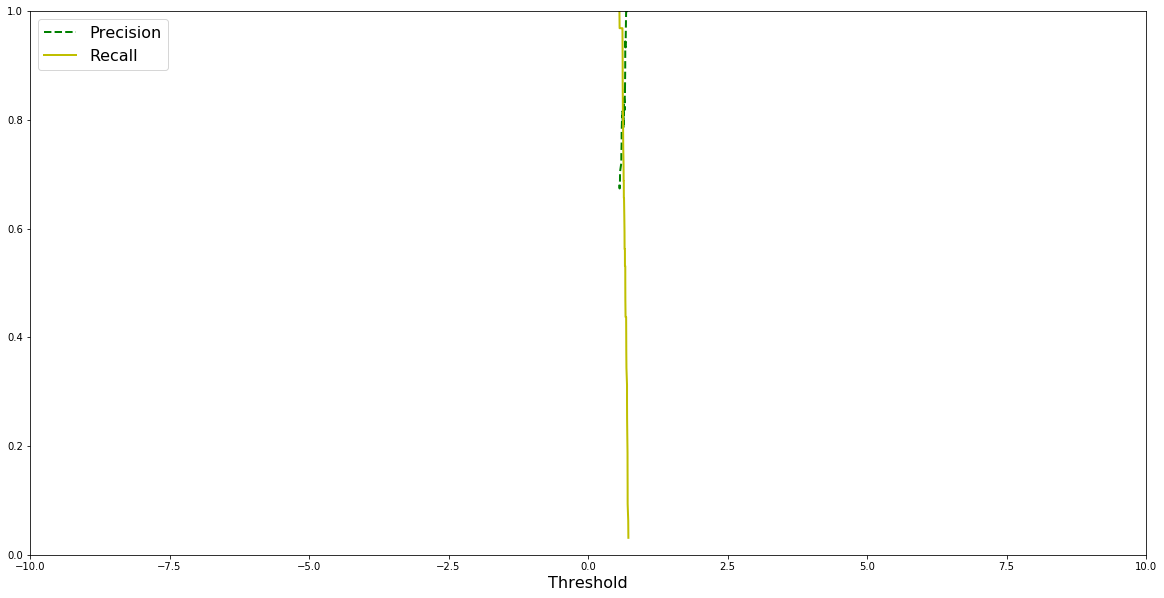

In [66]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "g--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "y-", label="Recall", linewidth=2)
    # The last precision and recall values are 1 and 0 respectively
    # and do not have a corresponding threshold. This ensures that the graph starts on the y axis
    
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10, 10])
# save_fig("precision_recall_vs_threshold_plot")
plt.show()

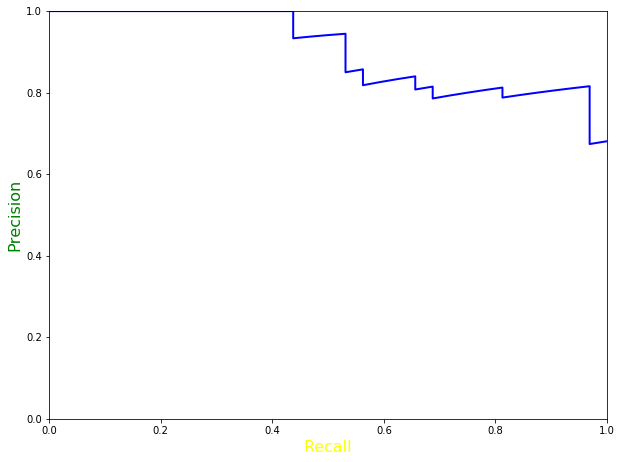

In [67]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16, color = 'yellow')
    plt.ylabel("Precision", fontsize=16, color = 'green')
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(10, 7.5))
plot_precision_vs_recall(precisions, recalls)
# save_fig("precision_vs_recall_plot")
plt.show()

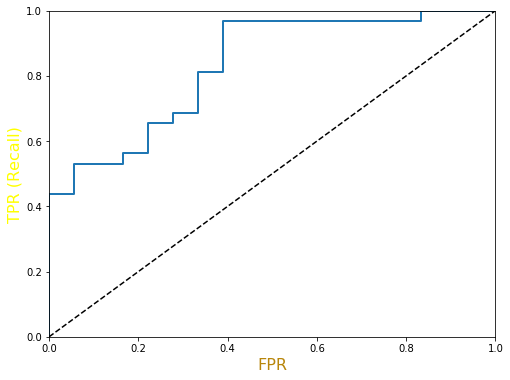

In [69]:
fpr, tpr, thresholds = roc_curve(test_label, y_scores_new)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16, color = "darkgoldenrod")
    plt.ylabel('TPR (Recall)', fontsize=16, color = "yellow")

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
# save_fig("roc_curve_plot")
plt.show()

In [71]:
roc_auc_score(test_label, y_scores_new)

0.8315972222222222

# Model Fitting (Logistic Regression)

In [63]:
param_distribs = {
        'C': np.random.uniform(0.001,10,10),
    }

logistic_regressor = LogisticRegression(penalty= 'l2', random_state=42)
rnd_search = RandomizedSearchCV(logistic_regressor, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='roc_auc', 
                                random_state=42, n_jobs=-1)


rnd_search.fit(train, train_label)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'C': array([2.83319, 7.66755, 1.57805, 1.58853, 8.58331, 4.65428, 5.19072,
       5.46422, 1.18328, 7.08929])},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [64]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.6763717948717948 {'C': 2.8331927671734554}
0.6764509157509156 {'C': 7.667546655302387}
0.6747003663003663 {'C': 1.5780542156597868}
0.6747003663003663 {'C': 1.5885283997819992}
0.6775575091575091 {'C': 8.583312511622673}
0.6774783882783884 {'C': 4.654278042701826}
0.6769765567765568 {'C': 5.190715721200098}
0.6769765567765568 {'C': 5.464215629081466}
0.6747003663003663 {'C': 1.183280007720856}
0.6769765567765568 {'C': 7.089294911395806}


In [97]:
estimator = rnd_search.best_estimator_

In [66]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', rnd_search.best_estimator_)
])

model.fit(train, train_label)
predictions = model.predict(test)

confusion_matrix(test_label, predictions)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([[12,  6],
       [ 6, 26]], dtype=int64)

In [67]:
print("accuracy_score: ", accuracy_score(test_label, predictions))
print("precision_score:", precision_score(test_label, predictions))
print("recall_score:", recall_score(test_label, predictions))

accuracy_score:  0.76
precision_score: 0.8125
recall_score: 0.8125


In [68]:
for i in range(10):
    score = model.decision_function(train.iloc[[int(i)]])
    label = train_label.iloc[[i]]
    print('score:', score, ' label:', label)

score: [6.95748041]  label: 18    1.0
Name: target, dtype: float64
score: [5.83917637]  label: 83    1.0
Name: target, dtype: float64
score: [6.55905252]  label: 208    1.0
Name: target, dtype: float64
score: [-6.02112688]  label: 38    0.0
Name: target, dtype: float64
score: [5.38876537]  label: 131    1.0
Name: target, dtype: float64
score: [6.38324687]  label: 23    1.0
Name: target, dtype: float64
score: [-6.10810225]  label: 63    0.0
Name: target, dtype: float64
score: [5.95355632]  label: 174    1.0
Name: target, dtype: float64
score: [12.70403995]  label: 176    1.0
Name: target, dtype: float64
score: [6.40888424]  label: 186    1.0
Name: target, dtype: float64


C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScal

In [69]:
y_scores = model.decision_function(test)
precisions, recalls, thresholds = precision_recall_curve(test_label, y_scores)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [70]:
precisions, recalls, thresholds

(array([0.74418605, 0.73809524, 0.75609756, 0.75      , 0.74358974,
        0.73684211, 0.75675676, 0.75      , 0.74285714, 0.76470588,
        0.78787879, 0.8125    , 0.80645161, 0.83333333, 0.82758621,
        0.85714286, 0.85185185, 0.84615385, 0.84      , 0.83333333,
        0.86956522, 0.86363636, 0.9047619 , 0.9       , 0.89473684,
        0.88888889, 0.88235294, 0.875     , 0.93333333, 0.92857143,
        0.92307692, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]),
 array([1.     , 0.96875, 0.96875, 0.9375 , 0.90625, 0.875  , 0.875  ,
        0.84375, 0.8125 , 0.8125 , 0.8125 , 0.8125 , 0.78125, 0.78125,
        0.75   , 0.75   , 0.71875, 0.6875 , 0.65625, 0.625  , 0.625  ,
        0.59375, 0.59375, 0.5625 , 0.53125, 0.5    , 0.46875, 0.4375 ,
        0.4375 , 0.40625, 0.375  , 0.375  , 0.34375, 0.3125 , 0.28125,
        0.25   , 0.21875, 0.1875 , 0.15625,

In [71]:
y_scores

array([  6.33798388,   9.77251881,  11.67158212,   6.8733486 ,
        -0.92020485,  -6.89456512,   0.8138422 ,  -0.77143366,
       -13.12745215,   2.51020228,  -4.20966937,   3.09357768,
        -8.5852798 ,   0.44618752,  -6.13579461,   3.26027403,
         4.62535767,   8.38205257,   7.03274545,  -7.4800789 ,
         0.53793733,   7.4522556 ,   6.20848828,  -1.5828046 ,
         2.18426842,   3.73803606,  -2.38472879,  -7.89000633,
        11.17356059,   9.30490881,  -2.43396285,   0.2054121 ,
         0.61767722,  -4.75609098,   3.49457603,   3.12609329,
        -3.22018732,   0.32533289,   5.28956661,  -2.70654422,
        -0.71632001,   4.37291904,  -8.51626311,  10.24533871,
         5.312525  ,   0.13572116,  -5.88625479,   4.66038181,
        10.88464423,   5.86622371])

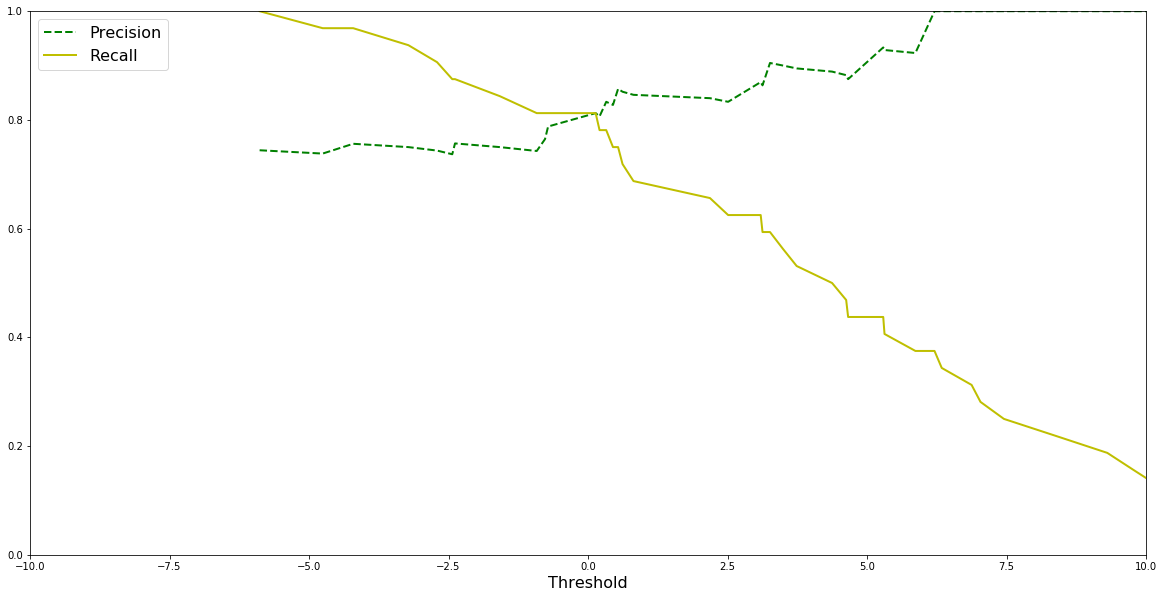

In [77]:
plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10, 10])
# save_fig("precision_recall_vs_threshold_plot")
plt.show()

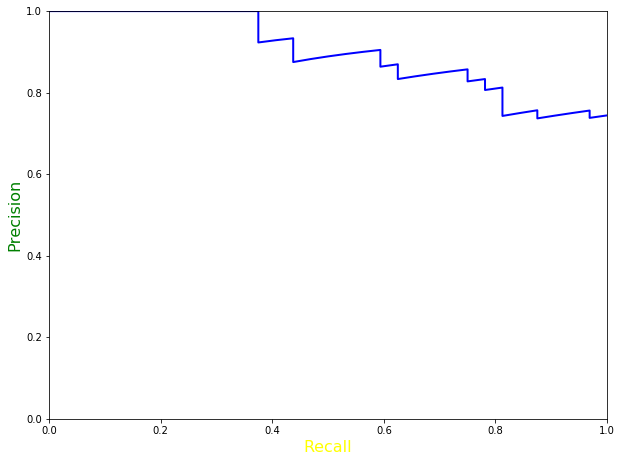

In [78]:
plt.figure(figsize=(10, 7.5))
plot_precision_vs_recall(precisions, recalls)
# save_fig("precision_vs_recall_plot")
plt.show()

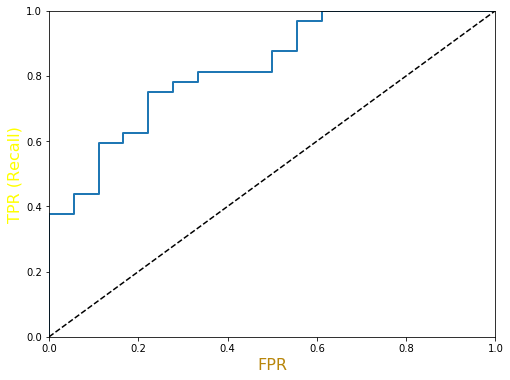

In [80]:
fpr, tpr, thresholds = roc_curve(test_label, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16, color = "darkgoldenrod")
    plt.ylabel('TPR (Recall)', fontsize=16, color = "yellow")

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
# save_fig("roc_curve_plot")
plt.show()

In [84]:
roc_auc_score(test_label, y_scores)

0.8246527777777779

In [85]:
rf_fi = rnd_search.best_estimator_.feature_importances_
type(rf_fi)

numpy.ndarray

In [91]:
rf_fi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00020908, 0.00031523, 0.00034848, 0.00036135, 0.00039853,
       0.00042036, 0.00043001, 0.00043946, 0.000454  , 0.00045417,
       0.00045723, 0.00046559, 0.00049307, 0.00049417, 0.00049604,
       0.00050928, 0.00051215, 0.0005209 , 0.00052627, 0.00056664,
       0.00063317, 0.00071776, 0.00072035, 0.00073259, 0.00075882,
       0.00077293, 0.00077448, 0.00078612, 0.00079787, 0.00081432,
       0.00081571, 0.00082148, 0.0008319 , 0.0008359 , 0.00083859,
       0.00085292, 0.0008942 , 0.00096053, 0.00100268, 0.00101653,
       0.0010178 , 0.00102831, 0.0010585 , 0.00107806, 0.00111109,
       0.00111695, 0.00113898, 0.00115058, 0.00115607, 0.00118583,
       0.0011877 , 0.00121312, 0.00122966, 0.00122993, 0.00124613,
       0.00125352, 0.00125724, 0.00125912, 0.0013001 , 0.00130369,
       0.00132011, 0.0013252 , 0.00134889, 0.00136113, 0.00136

In [98]:
selector = RFE(estimator, 30)
selector = selector.fit(train, train_label)



In [100]:
selector.ranking_

array([  1,   9, 200, 135, 194,  40, 163, 162,  30, 113,   1, 177, 128,
       106,  35,  84,   2,   1,   1,  38, 210, 164, 184, 159, 216,   1,
       217,  93, 202, 156,  90,  52, 169, 211,   1, 207,  92, 257, 100,
       241,  71,  55, 157,  34,   8,  96,  42, 131,  87,   1, 227, 126,
       112, 224, 121,  81, 253, 267, 260,  89,  85, 223, 269, 175,  23,
       220,   1, 256, 250, 191, 230,  98, 179,  15,   1, 145, 192,  26,
       264,  24, 141,   1, 115,   1,   1, 111, 105, 133, 229, 122,  68,
        79,   1, 266, 161, 138, 249, 117,  83, 225,  41, 153,  22, 243,
        59,  43, 205, 219, 137,   1, 215, 242, 233, 201, 140,  49, 188,
        14,   1,  67,  13, 127, 231, 144, 165, 108, 139, 206,   1,  94,
        36, 103, 130,  46,  44,  28,  73, 107,  21,  19, 181, 263, 186,
        16, 114, 172,  54, 208,   7,   1, 187,   1,   1, 190, 118, 209,
         6,  69, 125, 212,  88, 237, 240, 221,  27,  11,  25,  20,  91,
        32, 272, 259, 271, 265, 198, 189,  75,  82, 180,  51,  6

In [106]:
sorted(zip(map(lambda x: round(x, 4), selector.ranking_), feature_name))

[(1, '0'),
 (1, '10'),
 (1, '109'),
 (1, '118'),
 (1, '128'),
 (1, '149'),
 (1, '151'),
 (1, '152'),
 (1, '17'),
 (1, '18'),
 (1, '181'),
 (1, '184'),
 (1, '190'),
 (1, '192'),
 (1, '200'),
 (1, '218'),
 (1, '221'),
 (1, '238'),
 (1, '25'),
 (1, '293'),
 (1, '296'),
 (1, '299'),
 (1, '34'),
 (1, '49'),
 (1, '66'),
 (1, '74'),
 (1, '81'),
 (1, '83'),
 (1, '84'),
 (1, '92'),
 (2, '16'),
 (3, '229'),
 (4, '226'),
 (5, '280'),
 (6, '156'),
 (7, '148'),
 (8, '44'),
 (9, '1'),
 (10, '202'),
 (11, '165'),
 (12, '273'),
 (13, '120'),
 (14, '117'),
 (15, '73'),
 (16, '143'),
 (17, '283'),
 (18, '259'),
 (19, '139'),
 (20, '167'),
 (21, '138'),
 (22, '102'),
 (23, '64'),
 (24, '79'),
 (25, '166'),
 (26, '77'),
 (27, '164'),
 (28, '135'),
 (29, '188'),
 (30, '8'),
 (31, '277'),
 (32, '169'),
 (33, '289'),
 (34, '43'),
 (35, '14'),
 (36, '130'),
 (37, '282'),
 (38, '19'),
 (39, '252'),
 (40, '5'),
 (41, '100'),
 (42, '46'),
 (43, '105'),
 (44, '134'),
 (45, '228'),
 (46, '133'),
 (47, '261'),
 (48

## PCA

In [85]:
pca = PCA()
pca.fit(train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [86]:
d

6

In [87]:
pca = PCA(n_components=0.95)
train_reduced = pca.fit_transform(train)

In [88]:
pca.n_components_

6

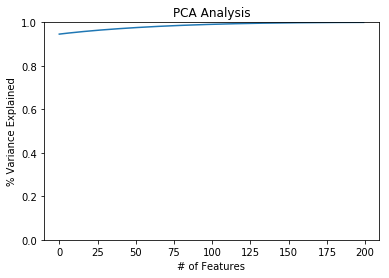

In [89]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,1.0, 10)
plt.style.context('seaborn-whitegrid')


plt.plot(cumsum)

# After PCA (to 6) SVM

In [90]:
param_distribs = {
        'gamma': np.random.uniform(0.001,10,10),
        'C': np.random.uniform(0.001,10,10),
    }

svm_clf = SVC(kernel='rbf', random_state=42)
rnd_search = RandomizedSearchCV(svm_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='roc_auc', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(train_reduced, train_label)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'gamma': array([5.59047, 2.09424, 8.45261, 0.90303, 8.935  , 7.61778, 8.03288,
       5.33744, 6.32382, 8.43558]), 'C': array([1.98515, 0.61982, 6.03581, 3.45203, 4.37528, 6.52103, 1.57877,
       4.88792, 2.68479, 3.6219 ])},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [91]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.44373443223443215 {'gamma': 0.9030287242929459, 'C': 2.6847919184522433}
0.44373443223443215 {'gamma': 0.9030287242929459, 'C': 6.521031829308279}
0.4891357142857143 {'gamma': 5.590469924769078, 'C': 4.887922850684362}
0.5 {'gamma': 7.6177840833067885, 'C': 4.375283774242668}
0.5 {'gamma': 8.93499705821317, 'C': 4.375283774242668}
0.5 {'gamma': 8.43558393759424, 'C': 3.4520343270093305}
0.5 {'gamma': 8.452608762253272, 'C': 6.035806614274967}
0.4891357142857143 {'gamma': 5.590469924769078, 'C': 2.6847919184522433}
0.4891357142857143 {'gamma': 5.590469924769078, 'C': 0.6198150794862182}
0.4891357142857143 {'gamma': 5.590469924769078, 'C': 1.9851510451475989}


In [92]:
rnd_search.best_estimator_

SVC(C=4.375283774242668, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=7.6177840833067885,
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [93]:
pca = PCA(n_components=6)

test_reduced = pca.fit_transform(test)

In [94]:
final_model = rnd_search.best_estimator_
final_model.fit(train_reduced, train_label)
final_predictions = final_model.predict(test_reduced)

confusion_matrix(test_label, final_predictions)

array([[ 0, 18],
       [ 0, 32]], dtype=int64)

In [95]:
print("accuracy_score: ", accuracy_score(test_label, final_predictions))
print("precision_score:", precision_score(test_label, final_predictions))
print("recall_score:", recall_score(test_label, final_predictions))

accuracy_score:  0.64
precision_score: 0.64
recall_score: 1.0


In [98]:
y_scores = final_model.decision_function(test_reduced)
precisions, recalls, thresholds = precision_recall_curve(test_label, y_scores)

In [99]:
y_scores

array([0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28,
       0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28,
       0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28,
       0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28,
       0.28, 0.28, 0.28, 0.28, 0.28, 0.28])

# After PCA (to 6) Logistic Regression

In [100]:
param_distribs = {
        'C': np.random.uniform(0.001,10,10),
    }

logistic_regressor = LogisticRegression(penalty= 'l2', random_state=42)
rnd_search = RandomizedSearchCV(logistic_regressor, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='roc_auc', 
                                random_state=42, n_jobs=-1)


rnd_search.fit(train_reduced, train_label)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'C': array([0.07852, 9.76689, 6.32765, 0.40928, 0.87459, 2.28883, 1.30022,
       1.23334, 7.43995, 4.29025])},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [101]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.6076164835164836 {'C': 0.07851639886966504}
0.6082128205128206 {'C': 9.766890567375237}
0.6082128205128206 {'C': 6.327650263894226}
0.6077186813186813 {'C': 0.40928468961889974}
0.6082443223443224 {'C': 0.8745888378117312}
0.6087699633699635 {'C': 2.2888304484237247}
0.6087699633699635 {'C': 1.3002228006012027}
0.6087699633699635 {'C': 1.2333365994699776}
0.6082128205128206 {'C': 7.4399455616858265}
0.6082128205128206 {'C': 4.29025061360412}


In [103]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', rnd_search.best_estimator_)
])

model.fit(train_reduced, train_label)
predictions = model.predict(test_reduced)

confusion_matrix(test_label, predictions)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 5, 13],
       [ 5, 27]], dtype=int64)

In [104]:
print("accuracy_score: ", accuracy_score(test_label, predictions))
print("precision_score:", precision_score(test_label, predictions))
print("recall_score:", recall_score(test_label, predictions))

accuracy_score:  0.64
precision_score: 0.675
recall_score: 0.84375


In [106]:
y_scores = model.decision_function(test_reduced)
precisions, recalls, thresholds = precision_recall_curve(test_label, y_scores)

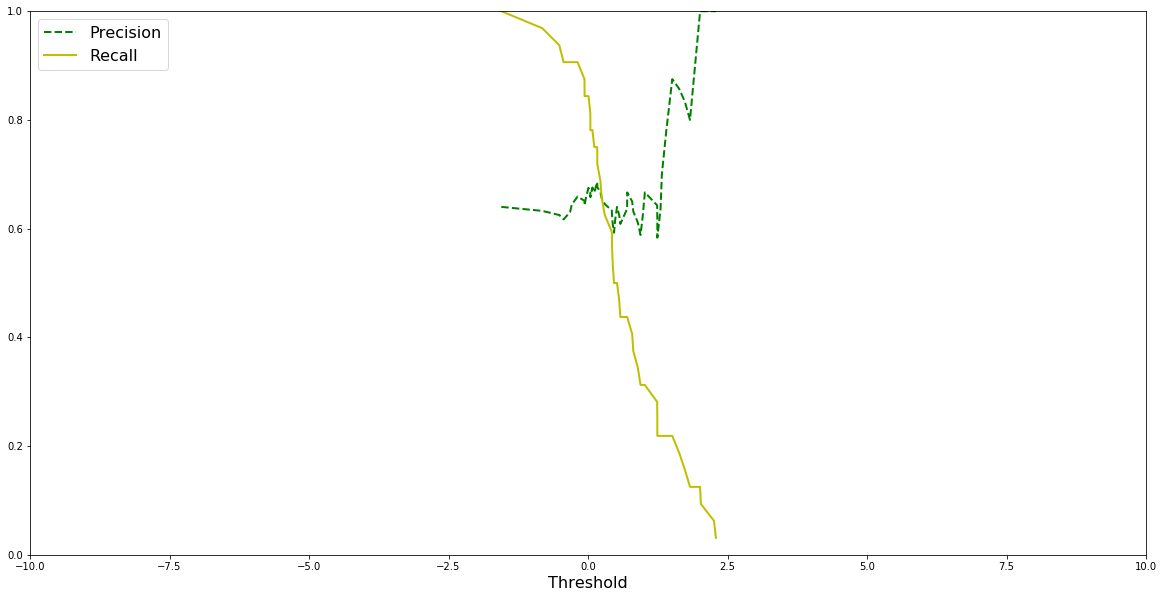

In [107]:
plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10, 10])
# save_fig("precision_recall_vs_threshold_plot")
plt.show()

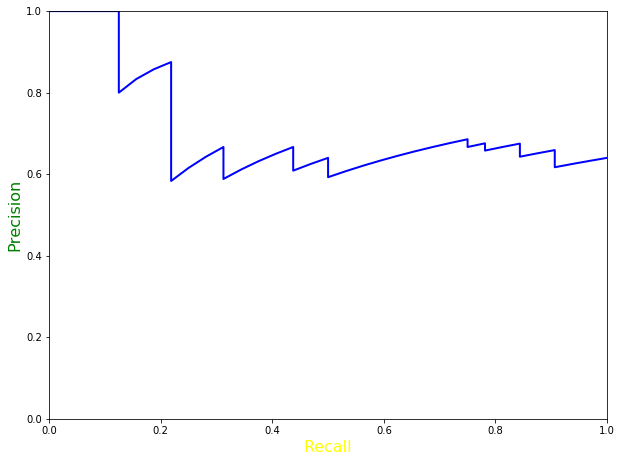

In [108]:
plt.figure(figsize=(10, 7.5))
plot_precision_vs_recall(precisions, recalls)
# save_fig("precision_vs_recall_plot")
plt.show()

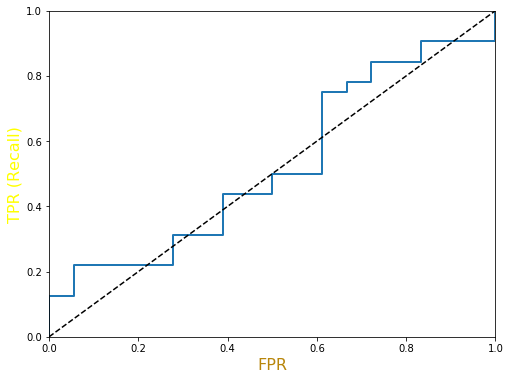

In [109]:
fpr, tpr, thresholds = roc_curve(test_label, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16, color = "darkgoldenrod")
    plt.ylabel('TPR (Recall)', fontsize=16, color = "yellow")

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
# save_fig("roc_curve_plot")
plt.show()

In [110]:
roc_auc_score(test_label, y_scores)

0.5243055555555556